In [1]:

import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/black-friday-sales-data/train.csv


# Veri seti yükleme  işlemi

In [2]:
df = pd.read_csv("/kaggle/input/black-friday-sales-data/train.csv")

# Veri seti ilk 5 satır  gözlemleme

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Veri setinin info değerlerini gösterir

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Veri seti boyutları hakkında  bilgi verildi

In [5]:
df.shape

(550068, 12)

# Veri çerçevesindeki sadece kategorik veya string türündeki sütunları seçip, yeni bir DataFrame (df_cat) oluşturduk ve aynı işlemi ondalık sayılar ve tam sayılar içinde  gerçekleştirdik (df_num)

In [6]:
df_cat = df.select_dtypes(include=["object","category"])

In [7]:
df_cat.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [8]:
df_num = df.select_dtypes(include=["float64","int64"])

In [9]:
df_num.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


# Sayısal ve kategorik sütun adlarını ayrı listelerde sakladık.

In [10]:
num_cols = [col for col in df_num.columns]
cat_cols = [col for col in df_cat.columns]

In [11]:
num_cols

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [12]:
df[num_cols]

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [13]:
cat_cols

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [14]:
df[cat_cols]

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


# Nümerik değerlerin dağılımları

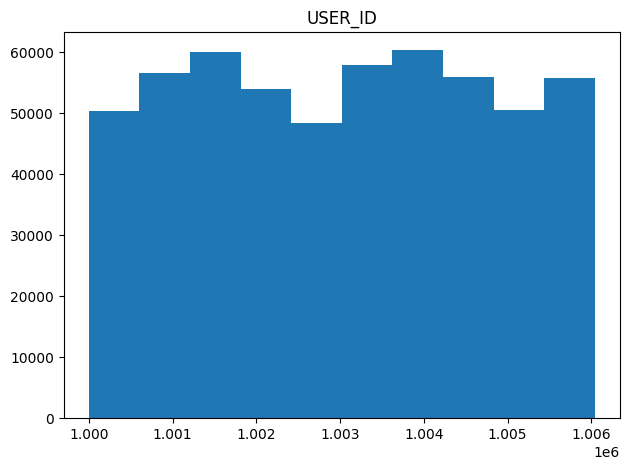

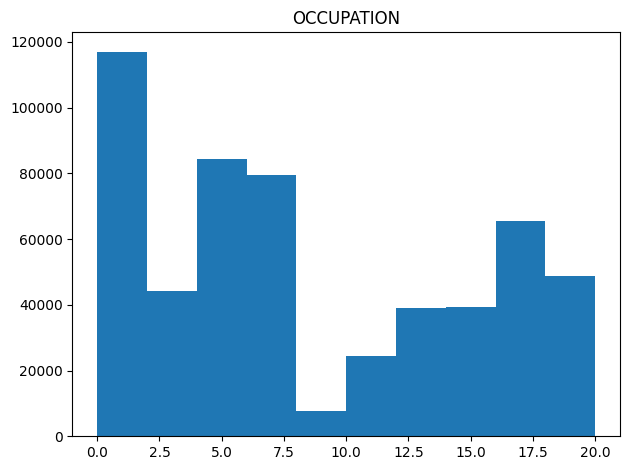

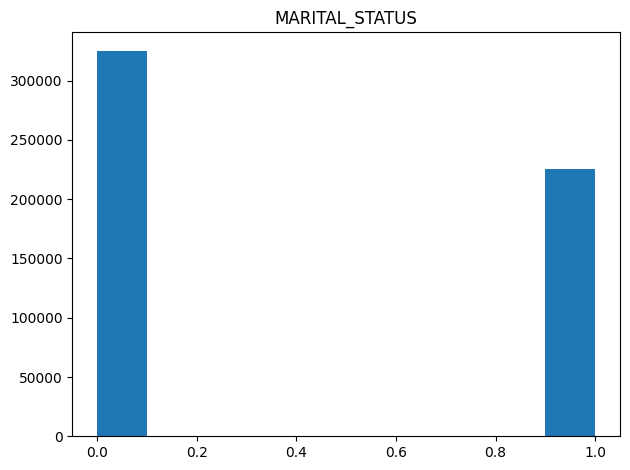

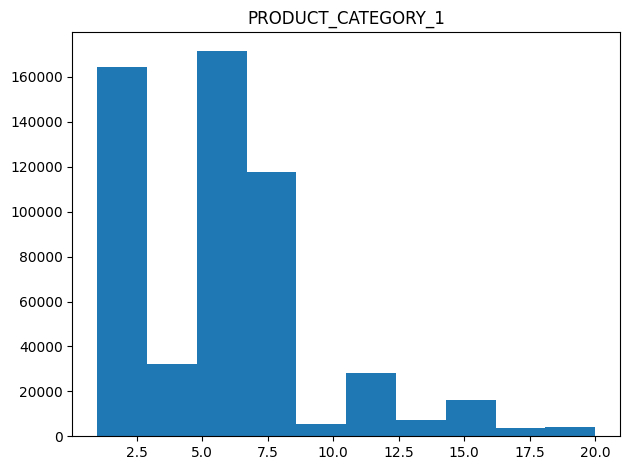

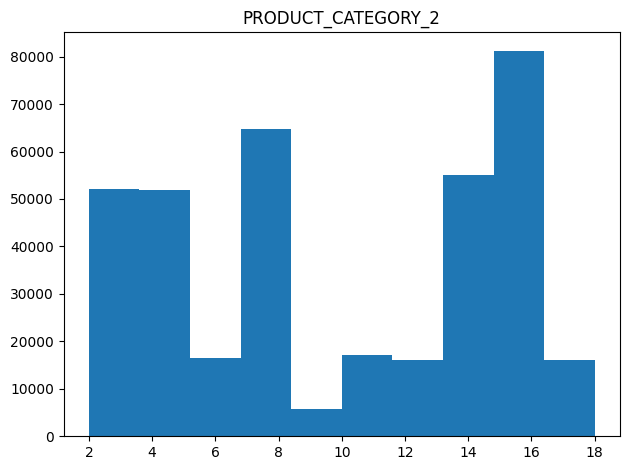

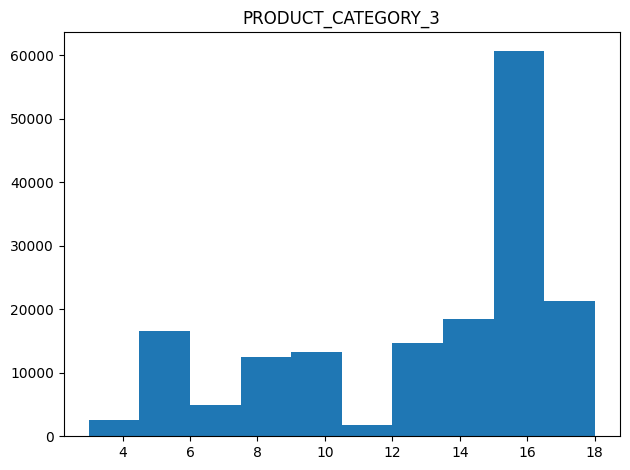

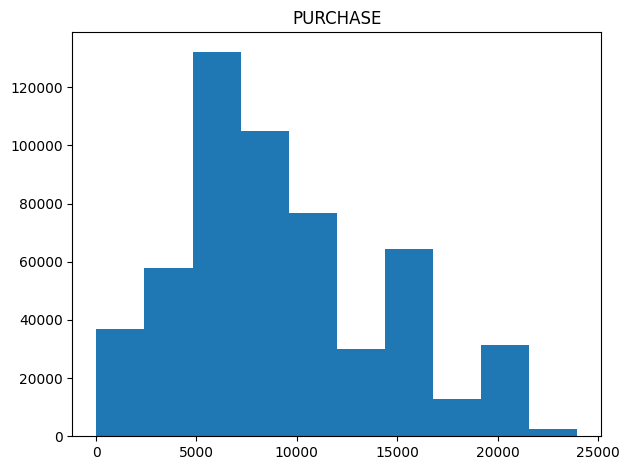

In [15]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()

# Veri setimizi güvene alıyoruz.

In [16]:
data  = df.copy()

In [17]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# "User_ID" ve "Product_ID" sütunların veri analizinden önce silinmesinin ana nedeni, bu sütunların analitik açıdan anlamlı bilgi taşımaması ve modelleme ya da görselleştirme sürecine olumsuz etkilerde bulunabilmesi açısından sildik."Product_Category_2","Product_Category_3" sütunlarımız ise doğal yollarla oluşmadığı için drop fonksiyonuyla silme işlemini gerçekleştirdik.

In [18]:
df = df.drop(["User_ID","Product_ID","Product_Category_2","Product_Category_3"],axis=1)

In [19]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


# Veri setinde topam null değerlerin sayısını büyükten  küçüğe doğru sıraladık

In [20]:
df.isnull().sum().sort_values(ascending=False)

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64


# Veri setine NaN değerler atandı

In [21]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
   
  
    df_missing = dataframe.copy()


    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    

    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing


In [22]:
df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [23]:
num = df.select_dtypes(include=["float64","int64"])
cat = df.select_dtypes(include=["object","category"])

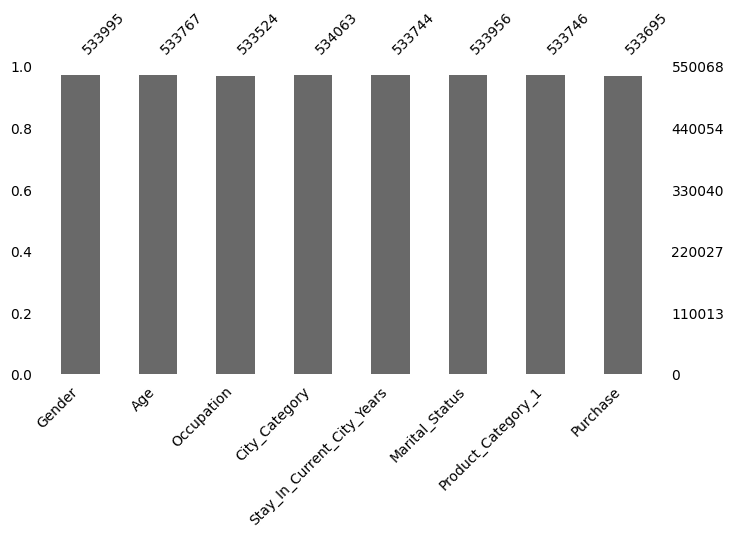

In [24]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

<Axes: >

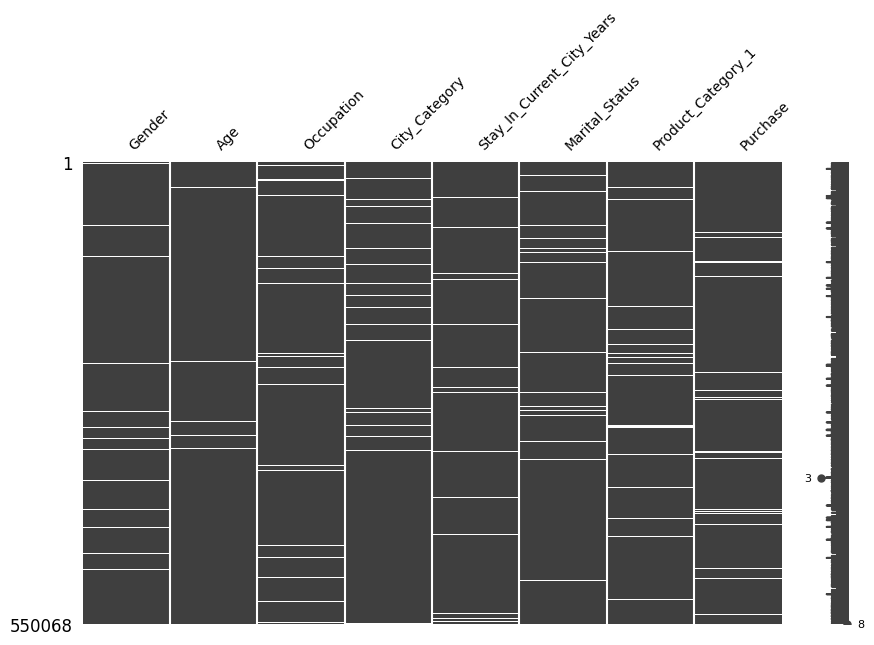

In [25]:
msno.matrix(df = df[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
                     'Marital_Status', 'Product_Category_1', 'Purchase']],
            figsize = (10, 6),  
            fontsize = 10)      


# Kategorik ve  Nümerik değerler için bir liste oluşturduk 

In [26]:
cat_cols =[col for col in cat.columns]
num_cols =[col for col in num.columns]

In [27]:
num_cols

['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']

In [28]:
cat_cols

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# "Marital_Status" sütununda saklı kategorik değerler bulunduğu için  bu sütunu  nümerik değerlerden kaldırdık ve kategorik değerlere ekledik

In [29]:
num_cols = [col for col in num_cols if col not in "Marital_Status"]

In [30]:
cat_cols.append("Marital_Status")

# Kategorik değişkenlerin dağılımları grafikleriyle gösterildi

In [31]:
def cat_plot(data,col_name):       
    sns.countplot(x=data[col_name],data=data)
    plt.title(col_name)
    plt.show()
    print(pd.DataFrame({col_name: data[col_name].value_counts(),
                        "Ratio": 100 * data[col_name].value_counts() / len(data)}))
    print("-----------------------------------------------------------------------------",end="\n\n\n")

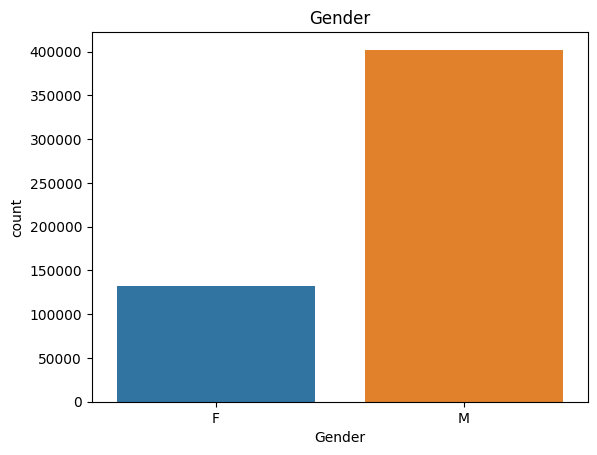

        Gender      Ratio
Gender                   
M       402194  73.117142
F       131801  23.960856
-----------------------------------------------------------------------------




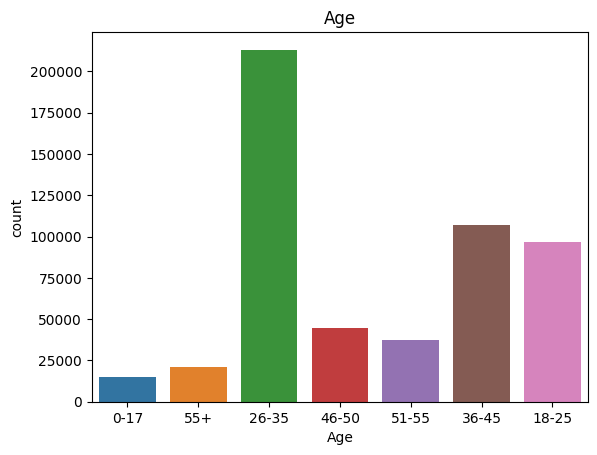

          Age      Ratio
Age                     
26-35  213102  38.741028
36-45  106708  19.399056
18-25   96719  17.583099
46-50   44347   8.062094
51-55   37336   6.787524
55+     20875   3.794985
0-17    14680   2.668761
-----------------------------------------------------------------------------




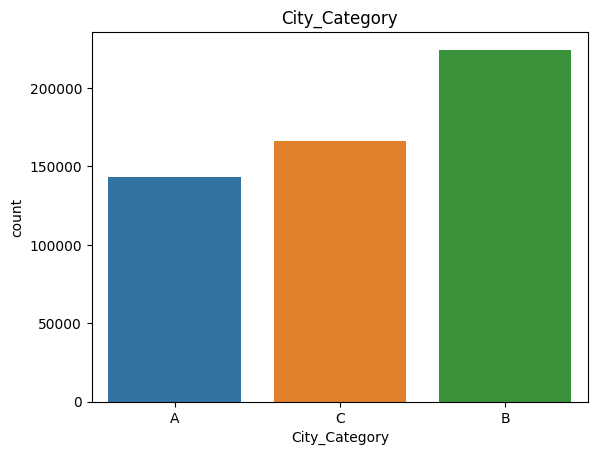

               City_Category      Ratio
City_Category                          
B                     224523  40.817317
C                     166052  30.187540
A                     143488  26.085502
-----------------------------------------------------------------------------




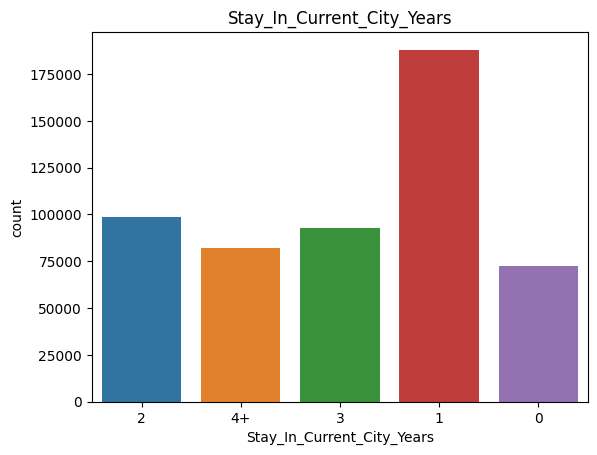

                            Stay_In_Current_City_Years      Ratio
Stay_In_Current_City_Years                                       
1                                               188001  34.177774
2                                                98830  17.966870
3                                                92490  16.814285
4+                                               82206  14.944698
0                                                72217  13.128740
-----------------------------------------------------------------------------




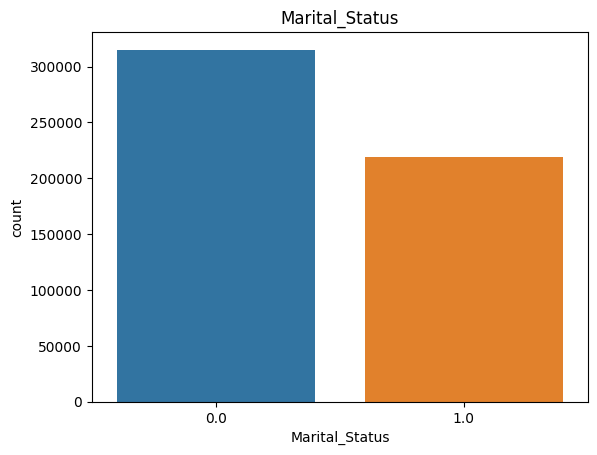

                Marital_Status      Ratio
Marital_Status                           
0.0                     315257  57.312369
1.0                     218699  39.758539
-----------------------------------------------------------------------------




In [32]:
for col in cat_cols:
    cat_plot(df,col)

# Nümerik değerlerin dağılımları

In [33]:
def num_plot(data,col_name):    
        colors = plt.cm.viridis(np.linspace(0,1,len(data[col_name].unique())))
        plt.hist(df[col_name],bins=50,color=colors[0],edgecolor='black')        
        plt.xlabel(col_name)
        plt.title(col_name)         
        plt.show()
        print(data[col_name].describe().T)  
        print("-----------------------------------------------------------------------------",end="\n\n\n")

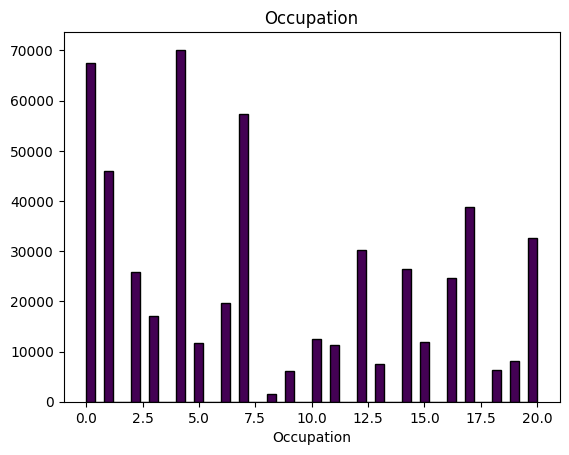

count    533524.000000
mean          8.076716
std           6.522869
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64
-----------------------------------------------------------------------------




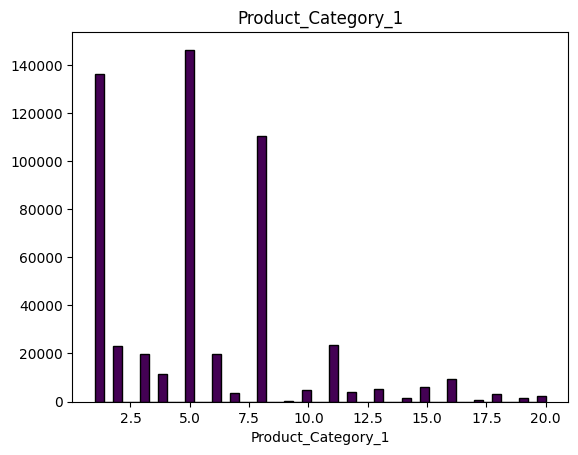

count    533746.000000
mean          5.404627
std           3.936295
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64
-----------------------------------------------------------------------------




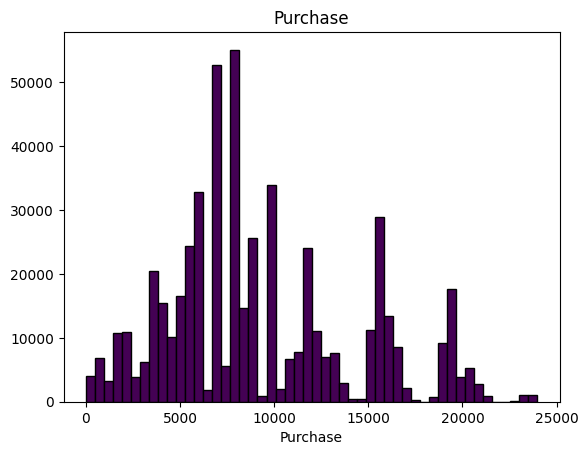

count    533695.000000
mean       9263.980614
std        5023.156683
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12055.000000
max       23961.000000
Name: Purchase, dtype: float64
-----------------------------------------------------------------------------




In [34]:
for col in num_cols:
    num_plot(df,col)

# Toplam null değerli hücre sayılarımız

In [35]:
df.isnull().sum()

Gender                        16073
Age                           16301
Occupation                    16544
City_Category                 16005
Stay_In_Current_City_Years    16324
Marital_Status                16112
Product_Category_1            16322
Purchase                      16373
dtype: int64

# Kategorik değişkenlerin satın alma tutarı ile aralarındaki dağılımlar

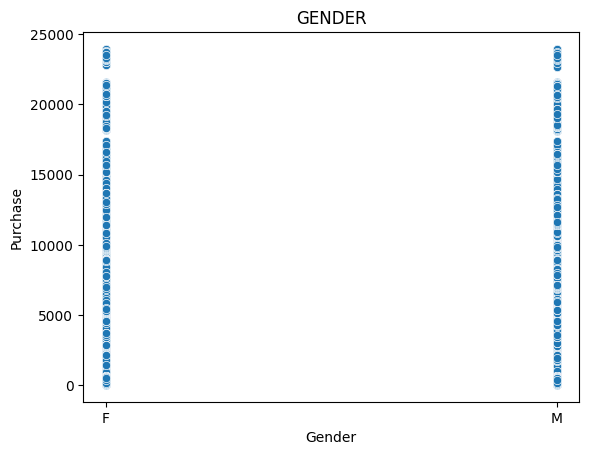

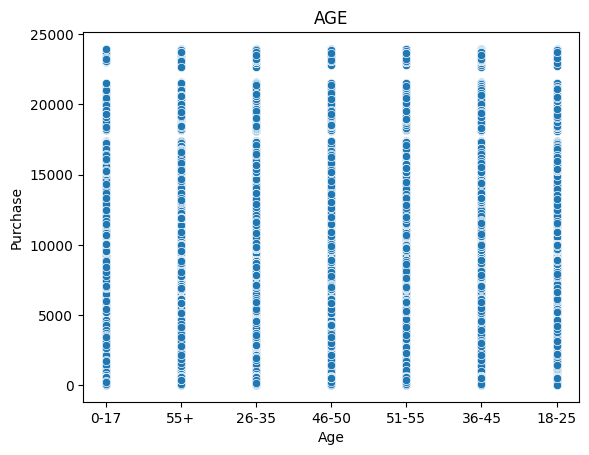

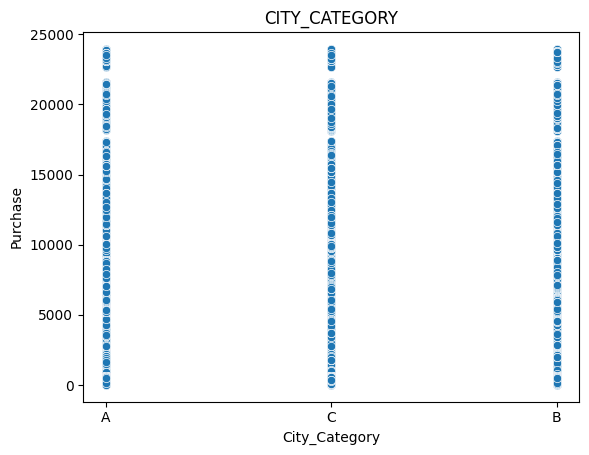

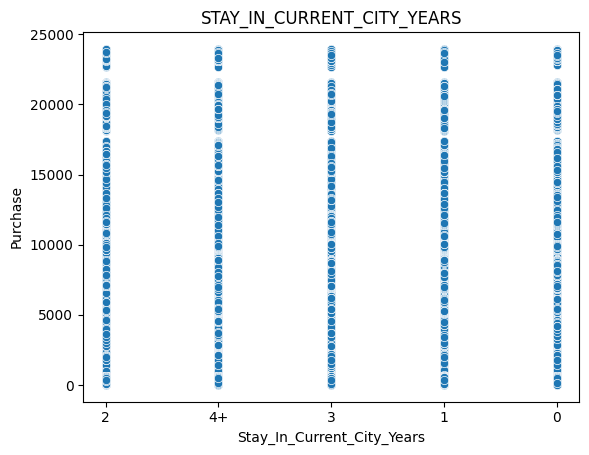

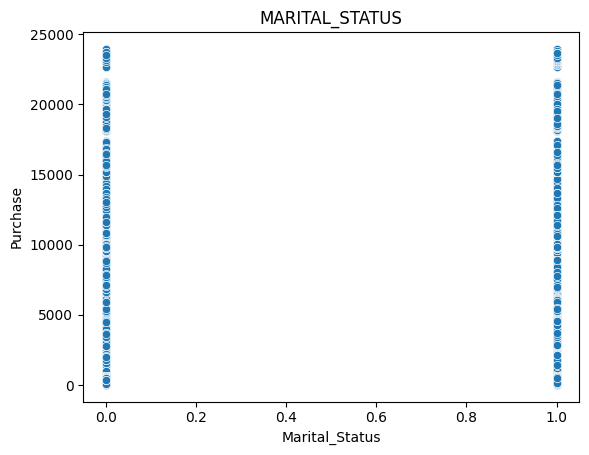

In [36]:
for col in cat_cols:
    sns.scatterplot(x=col,y="Purchase",data=df)
    plt.title(col.upper())
    plt.show()

# Nümerik değişkenlerin satın alma tutarı ile arasındaki korelasyonu gösterdik 

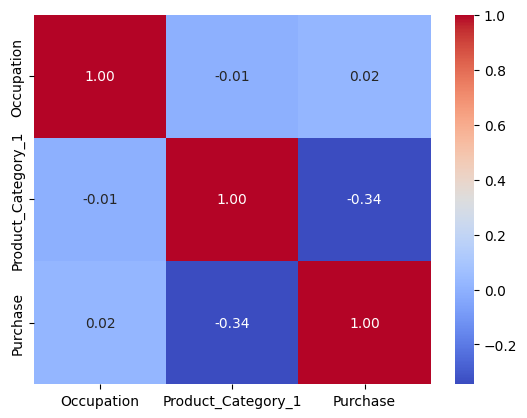

In [37]:
sns.heatmap(df[num_cols].corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [38]:
num_cols.remove("Purchase")

In [39]:
num_cols

['Occupation', 'Product_Category_1']

In [40]:
cat_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

# Veri setimizin tanımlayıcı istatistikleri

In [41]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Purchase
count,533524.000000,533956.000000,533746.000000,533695.000000
mean,8.076716,0.409582,5.404627,9263.980614
std,6.522869,0.491757,3.936295,5023.156683
min,0.000000,0.000000,1.000000,12.000000
25%,2.000000,0.000000,1.000000,5823.000000
50%,7.000000,0.000000,5.000000,8047.000000
75%,14.000000,1.000000,8.000000,12055.000000
max,20.000000,1.000000,20.000000,23961.000000


# Meslek ve Ürün sütunlarımızda saklı kategorik değerler olduğu için  kategorik listesine ekledik

In [42]:
cat_cols.append("Occupation")

In [43]:
cat_cols.append("Product_Category_1")

In [44]:
cat_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Occupation',
 'Product_Category_1']

# kategorik veri içeren her sütun için eksik verilerin (NaN) , (mod)  değerle doldurulmasını sağladık

In [45]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

# Toplam eksik veri sayısı

In [46]:
df.isna().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Purchase                      16373
dtype: int64

# Satış Tutarlarına  ait NaN değerlerin gösterimi

In [47]:
df[df["Purchase"].isna()].head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
73,F,18-25,3.0,B,3,0.0,1.0,NaN
97,M,18-25,16.0,B,0,0.0,3.0,NaN
126,F,26-35,7.0,A,3,1.0,1.0,NaN
279,M,26-35,4.0,B,3,1.0,2.0,NaN
299,F,0-17,10.0,C,2,0.0,15.0,NaN
309,M,26-35,0.0,B,1,0.0,1.0,NaN
353,M,26-35,2.0,B,3,0.0,1.0,NaN
372,M,26-35,17.0,C,1,0.0,1.0,NaN
480,M,55+,13.0,C,1,0.0,8.0,NaN
564,M,46-50,12.0,C,1,1.0,8.0,NaN


# Şehir Kategorisi,Cinsiyet,Yaş,Meslek sütunları için bir atama işlemi gerçekleştirdik

In [48]:
ase = df.groupby(["City_Category","Gender","Age","Occupation"],as_index=False)["Purchase"].mean()

# Şehir  Kategorisi ve Yaş için filitrelendirme işlemi gerçekleştirdik NaN değerimizi bulduk

In [49]:
ase[(ase["City_Category"]=="B")& (ase["Age"]=="55+")]

,City_Category,Gender,Age,Occupation,Purchase
288,B,F,55+,0.0,9340.671362
289,B,F,55+,1.0,8854.990099
290,B,F,55+,2.0,9278.470297
291,B,F,55+,3.0,10307.066265
292,B,F,55+,4.0,8783.450000
293,B,F,55+,6.0,9835.133333
294,B,F,55+,7.0,8410.777778
295,B,F,55+,8.0,NaN
296,B,F,55+,9.0,8549.500000
297,B,F,55+,11.0,10013.000000


# Veri setimizi güvene aldık 

In [50]:
df2= df.copy()

# Şehir kategorisi yaş cinsiyet ve mesleğe göre ortlama satışları doldurma işlemi gerçekleştirdik.

In [51]:
grouped_means = df2.groupby(["City_Category","Gender","Age","Occupation"],as_index=False)["Purchase"].mean()

In [52]:
def fill_missing_purchase(row):
    if pd.isna(row['Purchase']):
        return grouped_means[
            (grouped_means["City_Category"] == row["City_Category"]) &
            (grouped_means["Gender"] == row["Gender"]) &
            (grouped_means["Age"] == row["Age"]) &
            (grouped_means["Occupation"] == row["Occupation"])
        ]["Purchase"].values[0]
    else:
        return row['Purchase']

In [53]:
df2["Purchase"] = df2.apply(fill_missing_purchase,axis=1)

In [54]:
df2.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      1
dtype: int64

# bir adet NaN kalan verimize silme işlemi gerçekleştirdik

In [55]:
df2[df2["Purchase"].isna()]

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
227057,F,55+,8.0,B,0,0.0,1.0,NaN


In [56]:
df2 = df2.dropna(subset=["Purchase"])

In [57]:
df2.isna().sum().sum()

0

# SATIŞ TUTARLARININ BOX PLOT İLE DAĞILIMI
**Purchase değişkenindeki satın alma tutarlarının büyük çoğunluğunun 5000 ile 15.000 arasında yoğunlaştığını göstermektedir. Bununla birlikte, 20.000-25.000 aralığında birkaç aykırı değer bulunmaktadır. Bu aykırı değerler, diğer kullanıcılardan farklı satın alma davranışları sergileyen özel bir müşteri grubu (örneğin VIP müşteriler) olabilir.**


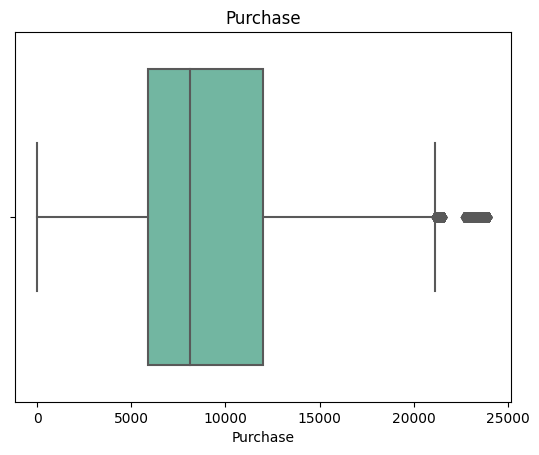

In [58]:
sns.boxplot(x="Purchase",data=df2,palette="Set2")
plt.title("Purchase")
plt.show()

In [59]:
cat_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Occupation',
 'Product_Category_1']

# DÜZENLENMİŞ VERİ SETİNDE KATEGORİK DEĞİŞKENLERİN DAĞILIMLARI
veri ön işleme adımını gerçekleştirdik artık kategorik ve nümerik değerlerimiz dağılımlarına  bakabiliriz

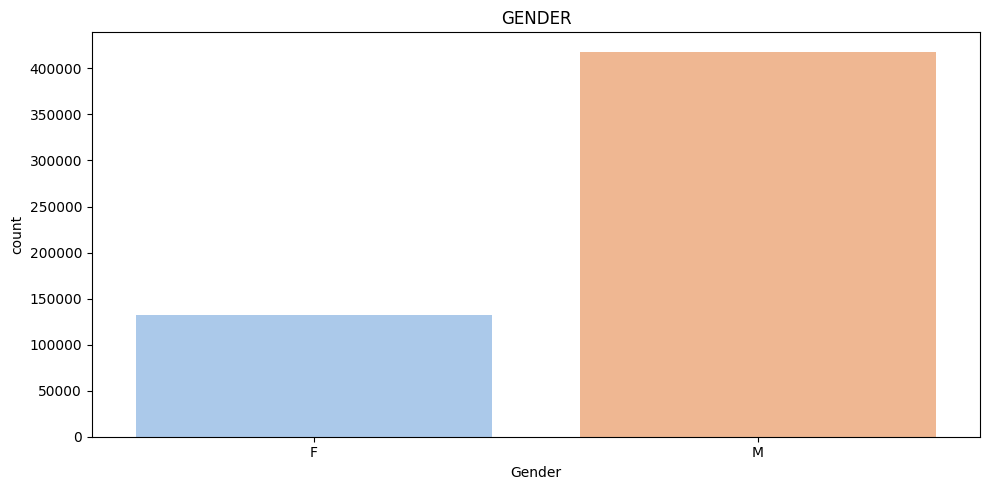

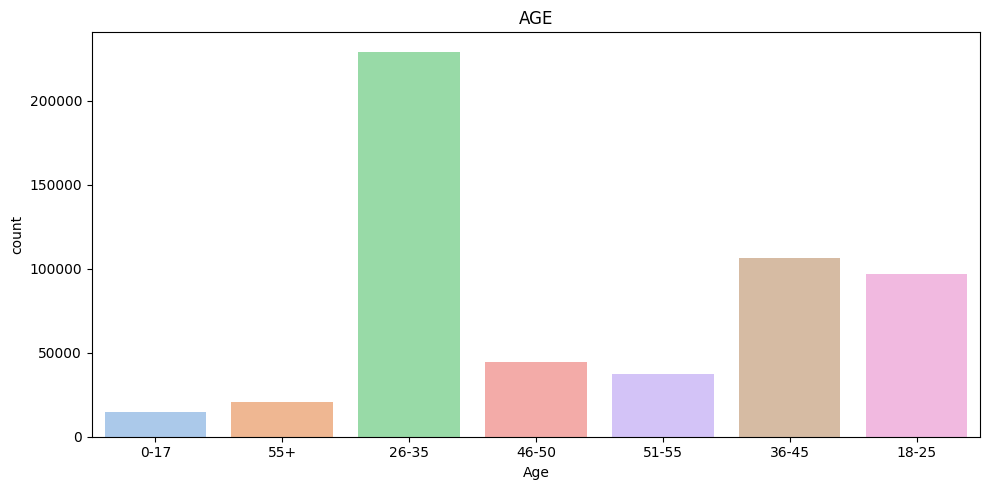

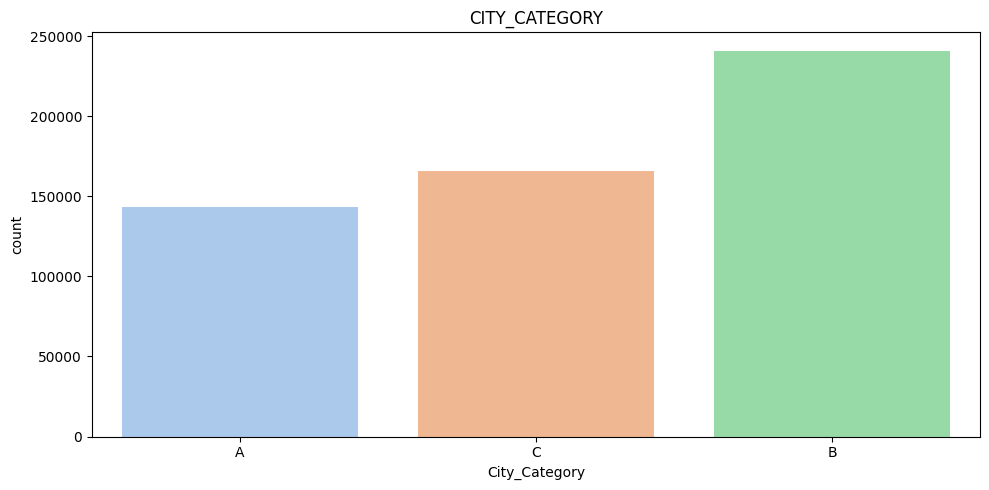

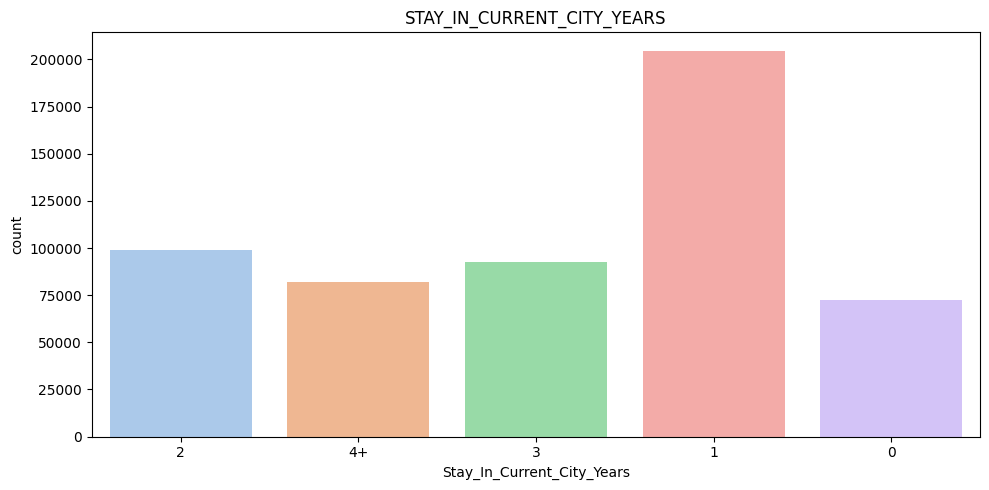

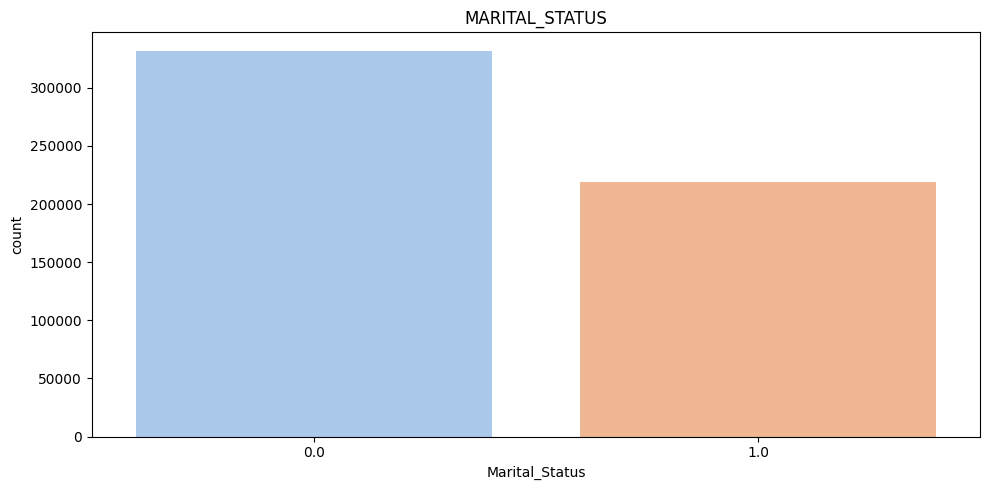

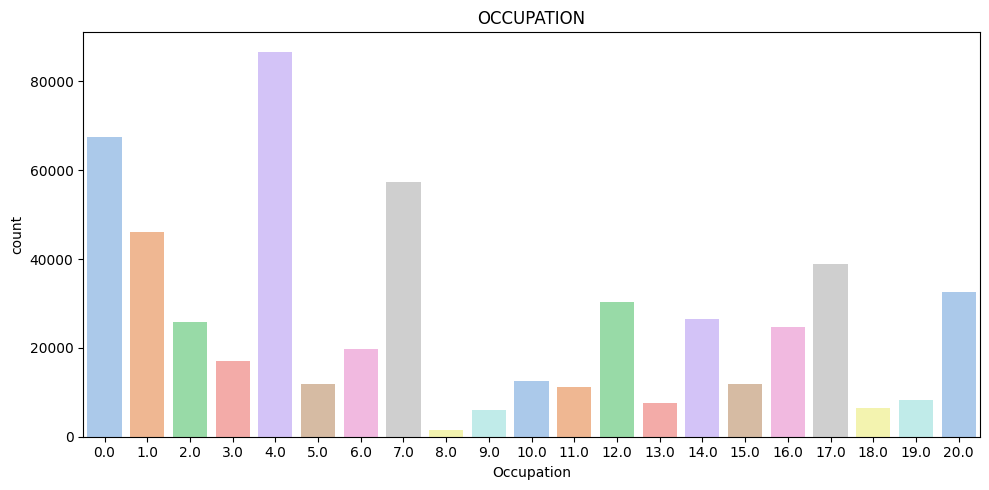

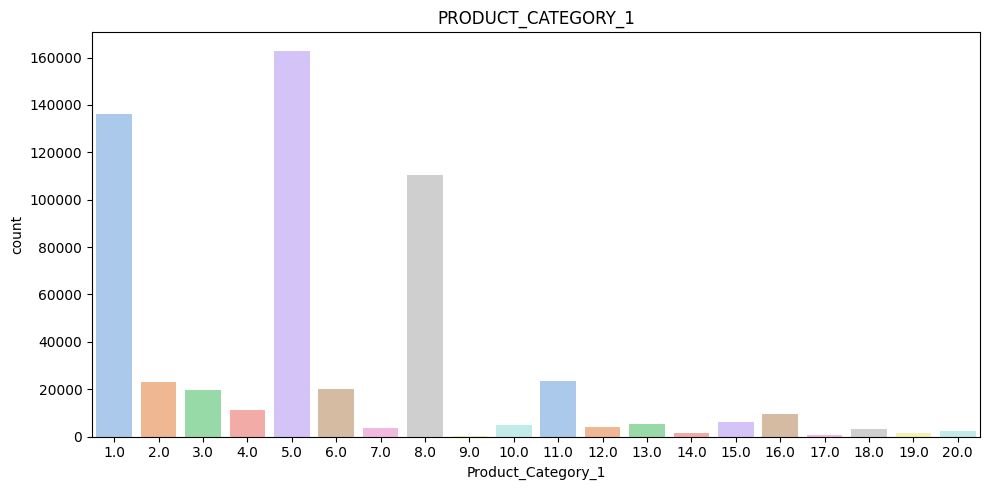

In [60]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,data=df2,palette="pastel")
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()    

# DÜZENLENMİŞ VERİ SETİNDE NÜMERİK DEĞİŞKENLERİN DAĞILIMLARI
**Satış tutarı  değişkenimizin dağılımına baktığımızda Sağa çarpık dağılım (Right-Skewed Distribution) veya pozitif çarpıklık (Positive Skewness), veri setinde kuyruk kısmının sağ tarafa doğru uzun olduğu bir dağılımı ifade eder.Verilerin 5000 ila 15000 arasında yoğunlaştığını görüyoruz.**

<Axes: xlabel='Purchase', ylabel='Density'>

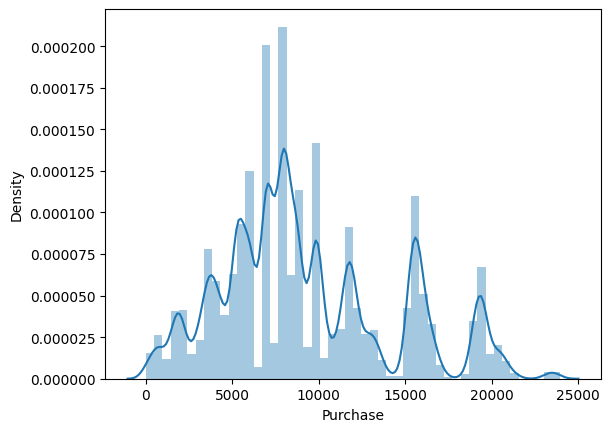

In [61]:
sns.distplot(df2["Purchase"])

In [62]:
df2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...
550063,M,51-55,13.0,B,1,1.0,20.0,368.0
550064,F,26-35,1.0,C,3,0.0,20.0,371.0
550065,F,26-35,15.0,B,4+,1.0,20.0,137.0
550066,F,55+,4.0,C,2,0.0,20.0,365.0


# ****HANGİ YAŞ ARALIKLARI ORTLAMA NE KADARLIK SATIN ALMA  GERÇEKLEŞTİRMİŞ?(SATIN ALMA TUTARI VS YAŞ)


In [63]:
age_purchase = df2.groupby('Age')['Purchase'].mean().reset_index()

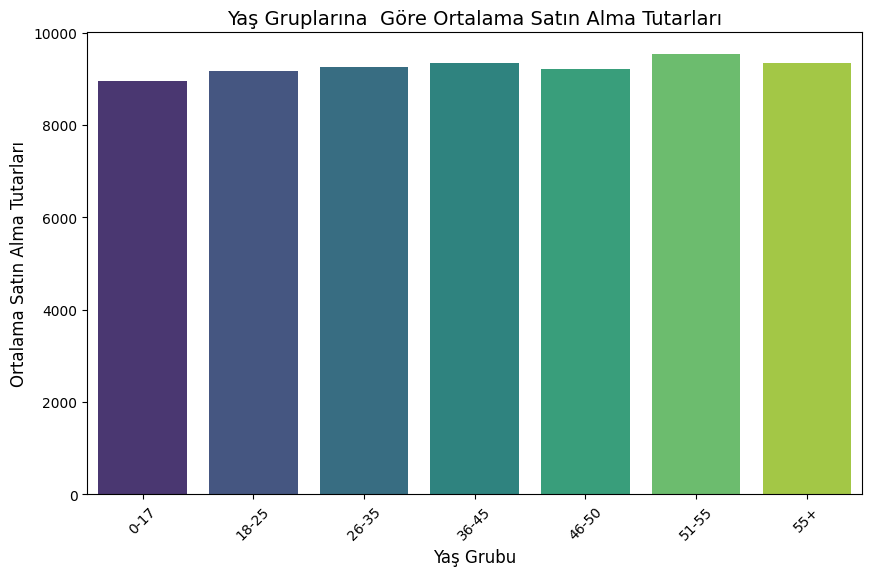

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Purchase',data=age_purchase,palette='viridis')
plt.title('Yaş Gruplarına  Göre Ortalama Satın Alma Tutarları',fontsize=14)
plt.xlabel('Yaş Grubu',fontsize=12)
plt.ylabel('Ortalama Satın Alma Tutarları',fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Bar plot grafiğimizden faydalanarak  yaşı 51 ila 55 arasında  olan insanların daha çok para harcadıkları görülüyor.Yaş ilerledikçe harcama  tutarlarında  zaman zaman dalgalanmalar ile seyrine devamediyor.En az harcamanın ise  0 ila 17 yaş arasında olduğu görülüyor.**

# HANGİ MESLEK GRUPLARI ORTALAMA NE KADARLIK SATIN ALMA GERÇEKLEŞTİRMİŞ?(SATIN ALMA TUTARI VS MESLEK)


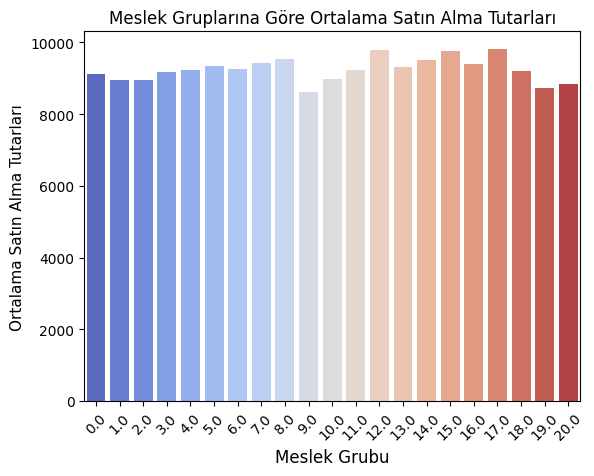

In [65]:
occupation_purchase =df2.groupby('Occupation',as_index=False)['Purchase'].mean()
sns.barplot(x='Occupation',y='Purchase',data=occupation_purchase,palette='coolwarm')
plt.title('Meslek Gruplarına Göre Ortalama Satın Alma Tutarları')
plt.xlabel('Meslek Grubu',fontsize=12)
plt.ylabel('Ortalama Satın Alma Tutarları',fontsize=11)
plt.xticks(rotation=45)
plt.show()

**Grafiğimize baktığımızda 12,15 ve 17 numaralı meslekler en çok para harcayan meslek olurken,9 numaralı meslek grubu en az para harcaması gerçekleştiren meslek olduğu görünmekte burda 9 numaralı meslek grubuna özel bir kampanya gerçekleştirebiliriz veya 17,15 ve 12 numaralı meslek gruplarına için harcamaya özel indirim kuponları gibi kampanyalardan fayda sağlayabiliriz.**

# En yüksek miktarda satın alma gerçekleştiren ilk 5 meslek grubu


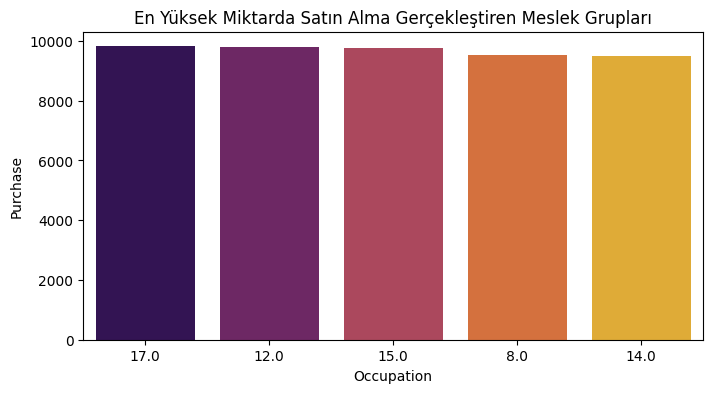

In [66]:
plt.figure(figsize=(8,4))
sns.barplot(x='Occupation', y='Purchase', data=occupation_purchase, palette='inferno', order=occupation_purchase.sort_values('Purchase', ascending=False)['Occupation'].head(5))
plt.title("En Yüksek Miktarda Satın Alma Gerçekleştiren Meslek Grupları")
plt.show()

**Mesleği 17,12 ve 15 olan  insanlara yönelik bir harcama  limitne özel bir indirim kuponu verilebilir.**

# En düşük miktarda satın alma  işlemi gerçekleştiren ilk  5 meslek  grubu


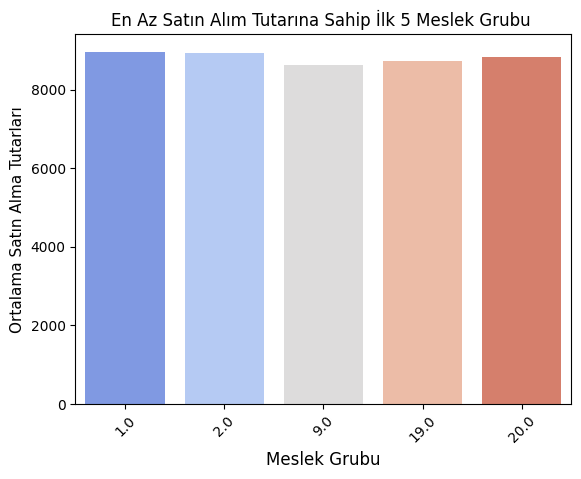

In [67]:

lowest_5_occupations = occupation_purchase.nsmallest(5, 'Purchase').sort_values('Purchase', ascending=True)
sns.barplot(x='Occupation', y='Purchase', data=lowest_5_occupations, palette='coolwarm')
plt.title('En Az Satın Alım Tutarına Sahip İlk 5 Meslek Grubu ')
plt.xlabel('Meslek Grubu', fontsize=12)
plt.ylabel('Ortalama Satın Alma Tutarları', fontsize=11)
plt.xticks(rotation=45)
plt.show()

**Mesleği 9 olan insan gruplarına özel bir indirim  yapılabilir.**

# HANGİ ÜRÜN KATEGORİLERİNDEN NE KADARLIK SATIŞ GERÇEKLEŞTİRİLDİ?(SATIN ALMA VS ÜRÜN KATEGORİSİ)



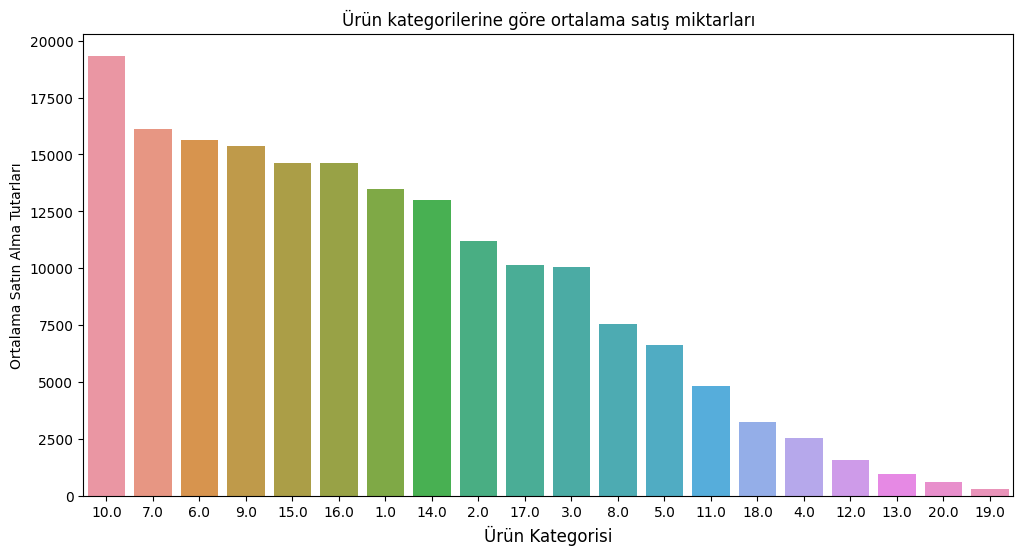

In [68]:
cat_purchase = df2.groupby('Product_Category_1',as_index=False)['Purchase'].mean().sort_values(by="Purchase",ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category_1', y='Purchase',data=cat_purchase,order=cat_purchase['Product_Category_1'])
plt.title("Ürün kategorilerine göre ortalama satış miktarları")
plt.xlabel('Ürün Kategorisi',fontsize=12)
plt.ylabel('Ortalama Satın Alma Tutarları',fontsize=10)
plt.show()

**Bar  grafiğimize baktığımızda en fazla para kazandıran ürün kategorisinin 10'uncu kategori olduğunu görüyoruz,10. kategorideki ürünlere özel harcama  limitine göre  indirim kuponları tanımlayabiliriz.En az para kazandıran ürün kategorisi ise 19'uncu kategori olduğunu görüyoruz,bu kategori için ürünlerde kampanyalar başlatıp indirim seçenekleri sunabiliriz.**


# Satış miktarı en yüksek olan ilk 5 ürün kategorisi

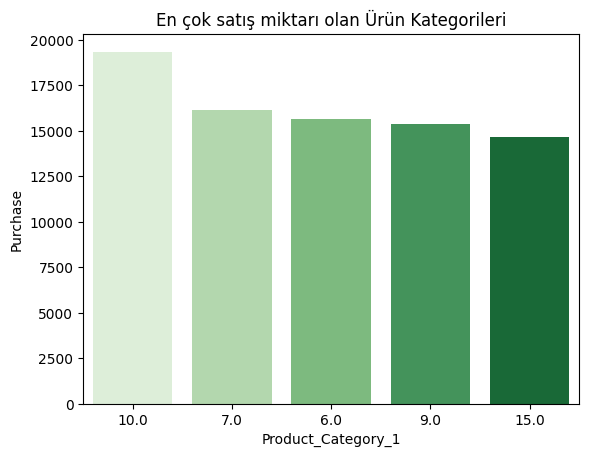

In [69]:
category_purchase_sorted = cat_purchase.sort_values('Purchase', ascending=False)
top_5_category = category_purchase_sorted.head(5)
bottom_5_category = category_purchase_sorted.tail(5)
sns.barplot(x='Product_Category_1', y='Purchase', data=top_5_category, palette='Greens',order=top_5_category.sort_values('Purchase',ascending=False)['Product_Category_1'])
plt.title("En çok satış miktarı olan Ürün Kategorileri")
plt.show()

# Satış miktarı en az olan ilk 5 ürün kategorisi

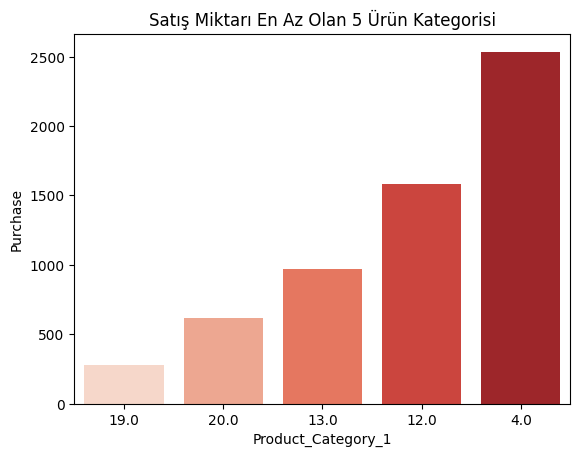

In [70]:
sns.barplot(x='Product_Category_1', y='Purchase', data=cat_purchase, palette='Reds',order=cat_purchase.sort_values('Purchase',ascending=True)['Product_Category_1'].head(5))
plt.title("Satış Miktarı En Az Olan 5 Ürün Kategorisi")
plt.show()

# HANGİ ŞEHİR KATEGORİLERİNDE  NE KADARLIK SATIŞ YAPILDI?(SATIN ALMA VS ŞEHİR KATEGORİSİ)


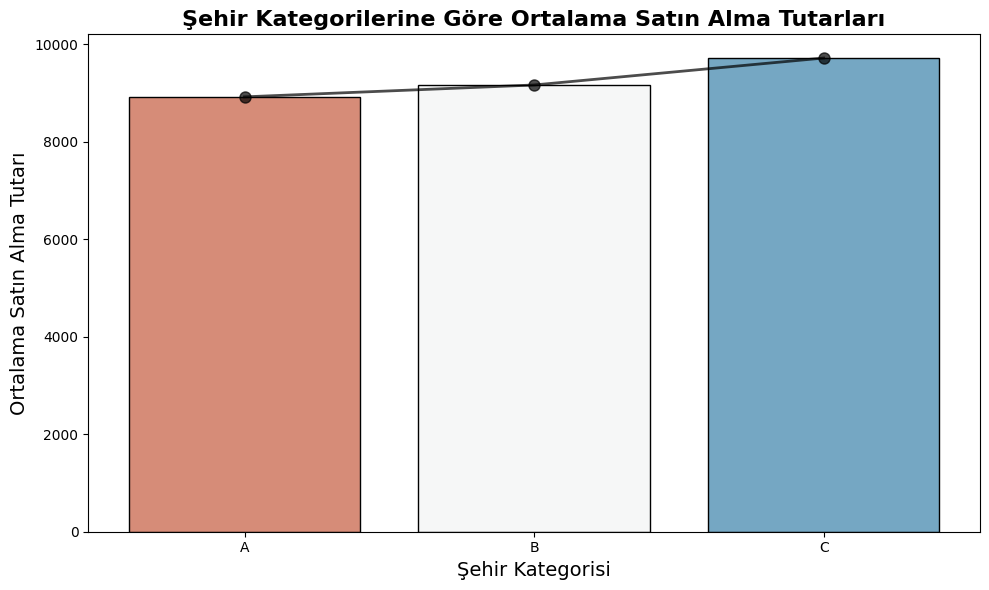

In [71]:

city_purchase = df2.groupby('City_Category', as_index=False)['Purchase'].mean()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='City_Category', y='Purchase', data=city_purchase, palette='RdBu', edgecolor='black')
tepe_noktalari = city_purchase['Purchase'].values
plt.plot(city_purchase['City_Category'], tepe_noktalari, marker='o', color='black', linewidth=2, markersize=8, linestyle='-', alpha=0.7)
plt.title('Şehir Kategorilerine Göre Ortalama Satın Alma Tutarları', fontsize=16, fontweight='bold')
plt.xlabel('Şehir Kategorisi', fontsize=14)
plt.ylabel('Ortalama Satın Alma Tutarı', fontsize=14)
plt.tight_layout()
plt.show()


**Bar grafiğimize baktığımızda en çok para harcayan şehir kategorisinin C olduğunu görüyoruz,burdaki şehirlerde  yaşayan insanlara özel hediye kampanyaları veya harcamaya  özel indirim kampanyaları yapabiliriz.En az oara harcayan şehir kategorisi olan A kategorisi için ise  burdaki şehirde yaşayan insanlara özel indirimler ve reklam kampanyalarını  o şehirlere özgü şekilde gerçekleştirerek iyleştirme  çalışmalarıda bulunabiliriz.**

# Şehir Kategorilerinin;Satın Alma Ortalamları ve  Satın Alma Sayıları


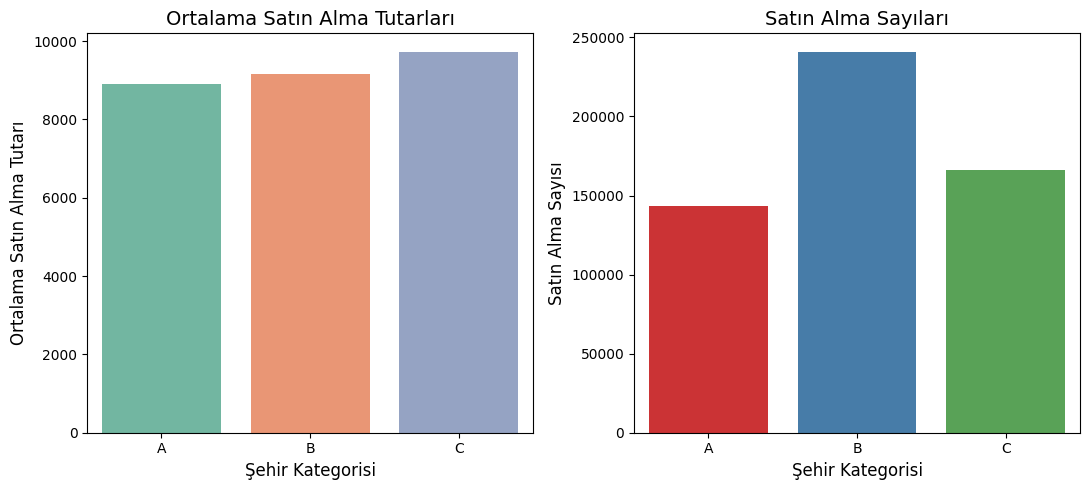

In [72]:
city_purc = df2.groupby("City_Category").agg({"Purchase":["mean","count"]})
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1) 
sns.barplot(
    x=city_purc.index, 
    y=city_purc['Purchase']['mean'], 
    palette="Set2"
)
plt.title('Ortalama Satın Alma Tutarları', fontsize=14)
plt.xlabel('Şehir Kategorisi', fontsize=12)
plt.ylabel('Ortalama Satın Alma Tutarı', fontsize=12)
plt.subplot(1, 2, 2) 
sns.barplot(
    x=city_purc.index, 
    y=city_purc['Purchase']['count'], 
    palette="Set1"
)
plt.title('Satın Alma Sayıları', fontsize=14)
plt.xlabel('Şehir Kategorisi', fontsize=12)
plt.ylabel('Satın Alma Sayısı', fontsize=12)
plt.tight_layout()
plt.show()

**Bar grafiklerine baktığımızda en  çok satın alma B şehir kategorisinde gerçekleşirken ortalama en fazla tutarda satın alma  işlemi C kategorisinde  gerçekleşiyor.Satın alma sayılarının kazanılan para ile arasında  ilişki olmadığı gözlemleniyor.B kategorisindeki şehirlerde  yaşayan  insanlara özel fazla satın alma işlemlerinde sepet analizi yaparak extra ürünlerde  indirim kampanyası gerçekleştirilebilir.C kategorisindeki insanlar için ise  harcama limitine özel indirim kuponu tanımlanabilir.Yaşadığı şehir A kategorisinde yer alan insanlar için ise hem sepet analizi hem de  harcamaya özel indirim kuponlarıyla satın alım veya satış tutarlarını arttırabiliriz.**

# CİNSİYETE GÖRE SATIN ALMA  MİKTARLARI NEDİR?(SATIN ALMA VS CİNSİYET)


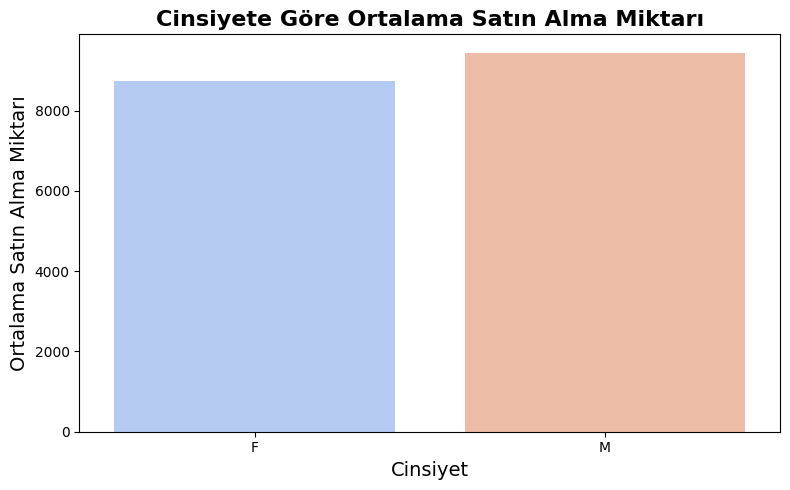

In [73]:
gender_purchase = df2.groupby('Gender')['Purchase'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Purchase', data=gender_purchase, palette='coolwarm')
plt.title('Cinsiyete Göre Ortalama Satın Alma Miktarı', fontsize=16, fontweight='bold')
plt.xlabel('Cinsiyet', fontsize=14)
plt.ylabel('Ortalama Satın Alma Miktarı', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Bar grafiğine baktığımızda erkeklerin alışverişlerde daha fazla para harcadığını görüyoruz,Kadınların  ise daha az para harcaması yaptığını belirliyoruz burada  erkeklere harcama limitine göre indirim kuponları ve satın alma sayıları yüksek olduğu için sepet analizi ile özel indirimler sunulabilir. kadınlara ise özel indirim kampanyaları düzenlenmelidir.Ayrıca kadınların satın alma başına ortalama  harcamaları  erkeklere yakın olduğu için yüksek fiyatlı ürünler kadınlarda rağbet gördüğünü görülmüştür bundan dolayı kadınlara sepet analiziyle yüksek fiyatlı ürünlerde extra alımlarda indirim uygulanabilir**

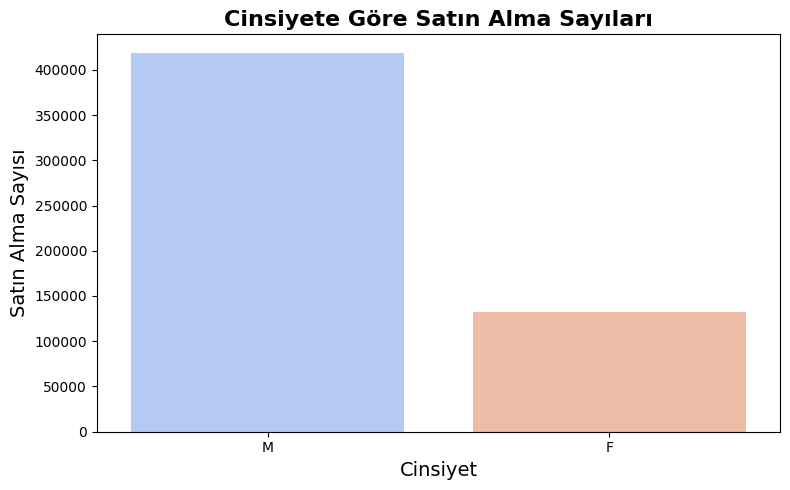

In [74]:
gender_counts = df2['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Count', data=gender_counts, palette='coolwarm')
plt.title('Cinsiyete Göre Satın Alma Sayıları', fontsize=16, fontweight='bold')
plt.xlabel('Cinsiyet', fontsize=14)
plt.ylabel('Satın Alma Sayısı', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

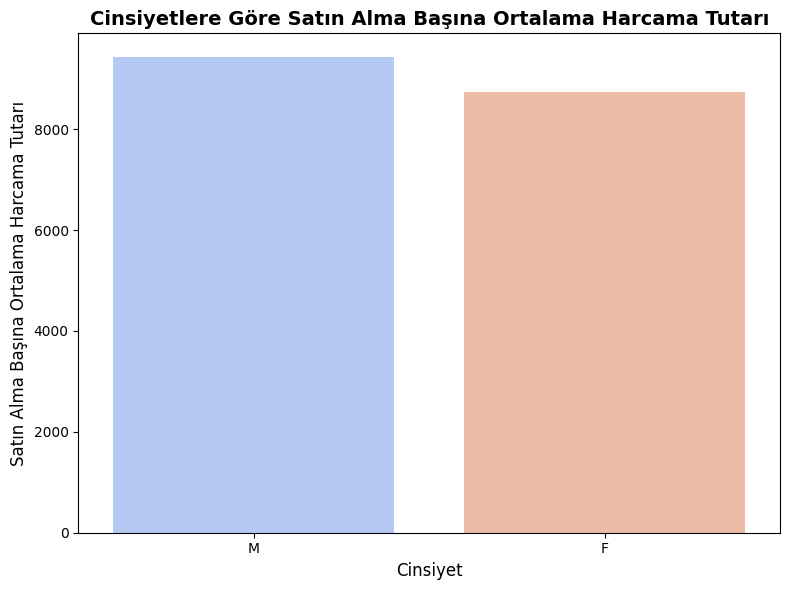

  Gender   Count  Total_Purchase  Avg_Purchase_Per_Transaction
0      M  418267    3.944231e+09                   9429.935382
1      F  131800    1.151540e+09                   8737.026734


In [75]:

gender_counts = df2['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
gender_total_purchase = df2.groupby('Gender')['Purchase'].sum().reset_index()
gender_total_purchase.columns = ['Gender', 'Total_Purchase']
gender_summary = pd.merge(gender_counts, gender_total_purchase, on='Gender')
gender_summary['Avg_Purchase_Per_Transaction'] = gender_summary['Total_Purchase'] / gender_summary['Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Avg_Purchase_Per_Transaction', data=gender_summary, palette='coolwarm')
plt.title('Cinsiyetlere Göre Satın Alma Başına Ortalama Harcama Tutarı', fontsize=14, fontweight='bold')
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Satın Alma Başına Ortalama Harcama Tutarı', fontsize=12)
plt.tight_layout()
plt.show()
print(gender_summary)

# Satın alma  ücreti en düşük olan ilk 5 ürün


In [76]:
df2_sorted = df2.sort_values(by='Purchase', ascending=False)
display(df2_sorted.head())

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
370891,M,26-35,17.0,C,3,0.0,10.0,23961.0
87440,M,26-35,4.0,B,2,0.0,10.0,23961.0
93016,M,26-35,0.0,C,1,0.0,10.0,23961.0
503697,M,36-45,12.0,B,1,0.0,10.0,23960.0
349658,M,51-55,20.0,A,0,1.0,10.0,23960.0


ÇIKARIMLAR;
1. En ucuz ürünü cinsiyeti erkek olanlar almıştır.
2. Genel itibariyle en ucuz ürünler 26-35 yaş aralığındakiler satın almıştır.
3. Genel itibariyle en ucuz ürünleri evli olmayanlar almıştır.
4. Satın alınan en ucuz ürünlerin kategorileri 10 dur.
5. Genel itibariyle en ucuz ürünleri şuan ikamet ettiği şehirde bir yıl geçirenler almıştır.
6. Genel itibariyle en ucuz ürünleri alan insanların yaşadığı şehirin kategorisi A veya B dir.

# Satın alma  ücreti en düşük olan ilk 5 ürün


In [77]:
df2.groupby(["City_Category","Gender"],as_index=False)["Purchase"].mean().sort_values("Purchase",ascending=False)

,City_Category,Gender,Purchase
5,C,M,9899.719866
3,B,M,9351.356646
4,C,F,9123.266457
1,A,M,9020.465240
0,A,F,8579.252400
2,B,F,8564.179119


ÇIKARIMLAR;
1. Genel itibariyle cinsiyeti kız olanlar en pahalı ürünleri almıştır.
2. En pahalı ürünleri satın alan  insanların bulduğu şehirlerin bulduğu kategorileri değişkenlik göstermektedir.

# ŞEHİR KATEGORİLERİNDE CİNSİYETLERE GÖRE SATIN ALIM  MİKTARLARI


In [78]:
df_gender_city = df2.groupby(["Gender","City_Category"],as_index=False)[["Purchase"]].mean()

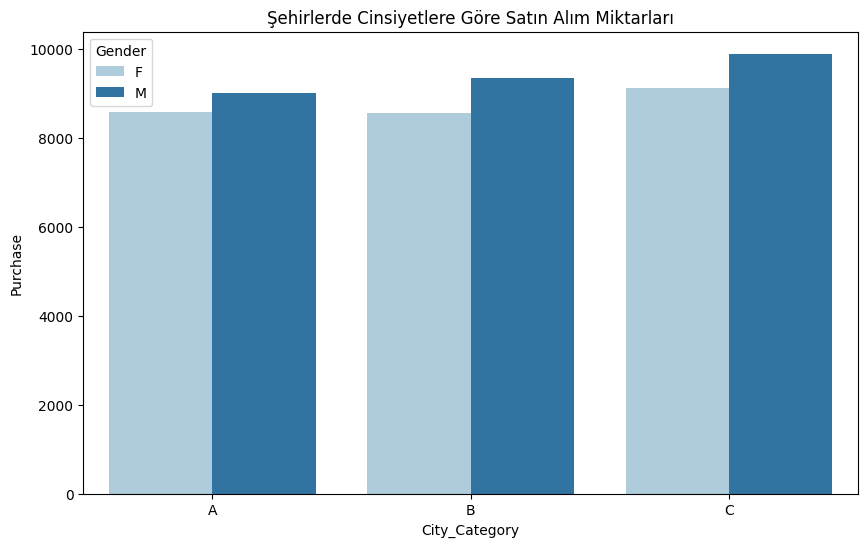

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x="City_Category",y="Purchase",hue="Gender",data=df_gender_city,palette="Paired")
plt.title("Şehirlerde Cinsiyetlere Göre Satın Alım Miktarları")
plt.show()

ÇIKARIMLAR;
1. Erkeklerin harcamaları her şehir kategorisinde artış gösteriyor.
2. Kadınlar için de benzer bir artış gözlemlense de fark, erkeklere göre daha düşük bir düzeyde.
ÖNERİLER;
1. Özellikle C kategorisinde yaşayan erkek müşteriler, daha yüksek harcama potansiyeli taşıyor. Bu grup, kampanya ve promosyonlar için hedef alınabilir.
2. Kadın müşterilerin harcama düzeyini artırmak için stratejiler geliştirilebilir, özellikle C kategorisi dışındaki şehirlerde.

# Yaş Gruplarının Yaşadıkları Şehirlere Göre Satış Mikarları



In [80]:
age_sales = df2.groupby(["Age"],as_index=False)[["Purchase"]].mean()

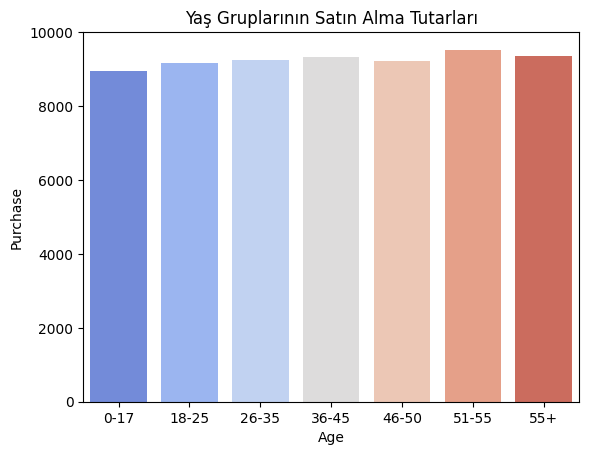

In [81]:
sns.barplot(x= 'Age',y='Purchase',data=age_sales,palette='coolwarm')
plt.title("Yaş Gruplarının Satın Alma Tutarları")
plt.show()

ÇIKARIMLAR;
1)  A kategorisinde yaşayan insanlar için en fazla harcama yapan yaş grubu 51 ila 55 dir.
2)  B kategorisinde ise en fazla harcama yapan yaş grubu ise 55 ve daha  büyük yaşı olan  insanlar gerçekleştirmiştir.
3)  C kategorisinde en fazla  harcama  yapan yaş grubu 35 ila 45 arası yaş grubudur.
4)  0 ila 55 yaş arasında  en fazla harcama  yapan  insanların C kategorsindeki şehirlerde yaşadığı saptanmıştır.
5)  55 ve üstü yaş grupundaki en fazla harcama  yapan insanların B kategorisinde olduğu saptanmıştır.
6)  A kategorisinde yaşayan 46 yaş üstü insanların az harcama yaptıkları görülmüştür.


In [82]:
age_city = df2.groupby(["City_Category","Age"],as_index=False)[["Purchase"]].mean()

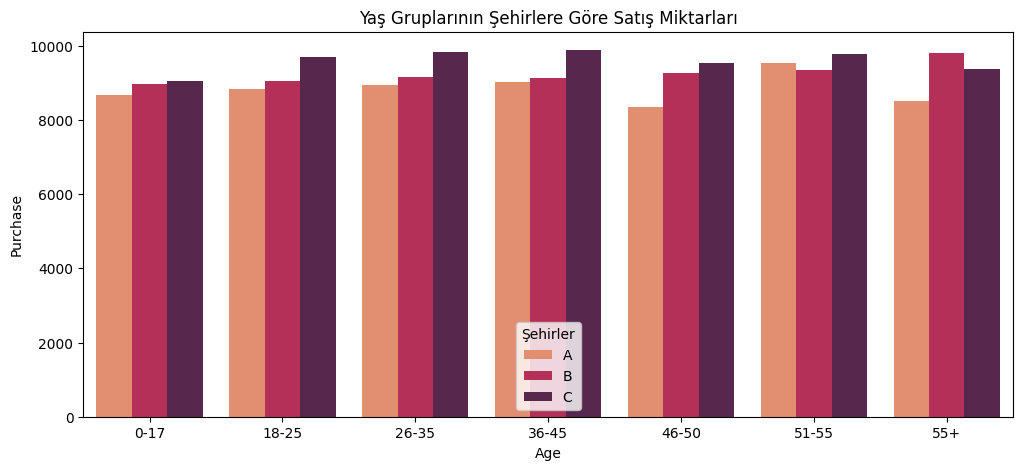

In [83]:
plt.figure(figsize=(12,5))
sns.barplot(data=age_city, x="Age",y="Purchase",hue="City_Category",palette="rocket_r")
plt.title("Yaş Gruplarının Şehirlere Göre Satış Miktarları")
plt.legend(title="Şehirler",loc='lower center')
plt.show()

# Ürün Kategorileri Ve Yaş Gruplarına  Göre Ortalama  Satın Alma Tutarları


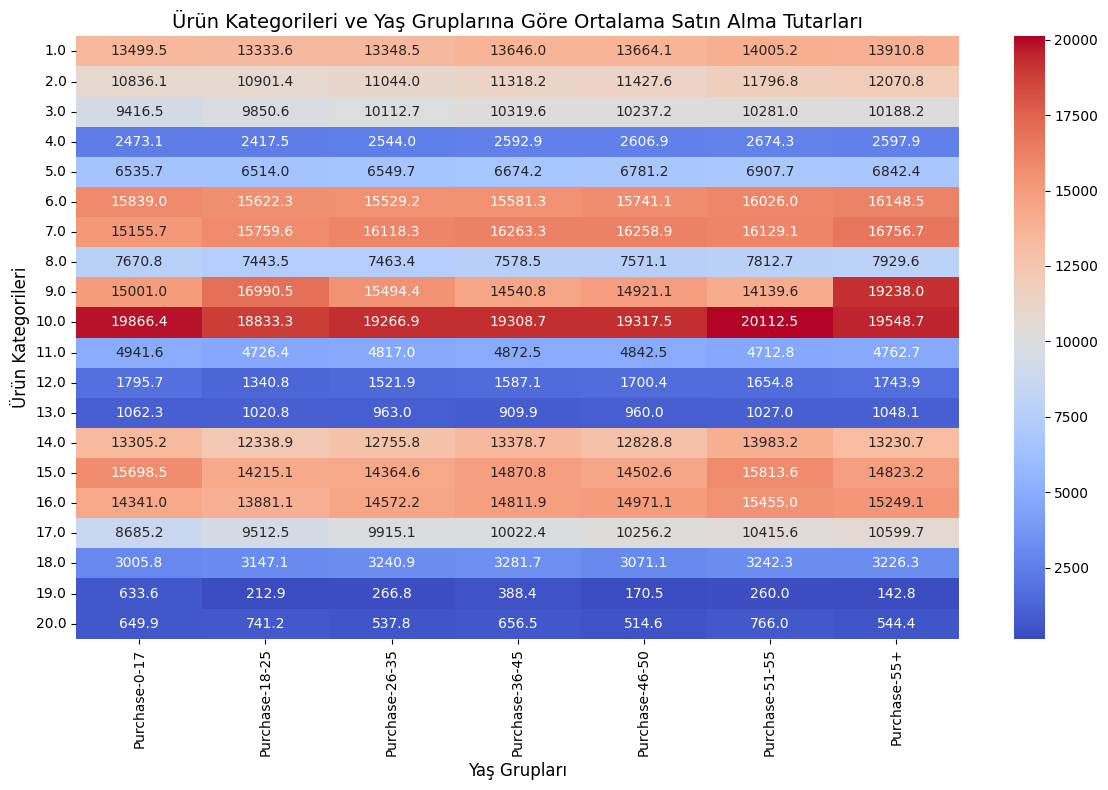

In [84]:
heatmap_data = df2.groupby(["Product_Category_1", "Age"])[["Purchase"]].mean().unstack()

plt.figure(figsize=(12, 8))

sns.heatmap(
    heatmap_data, 
    annot=True,  
    fmt=".1f", 
    cmap="coolwarm"  
)

plt.xlabel("Yaş Grupları", fontsize=12)
plt.ylabel("Ürün Kategorileri", fontsize=12)
plt.title("Ürün Kategorileri ve Yaş Gruplarına Göre Ortalama Satın Alma Tutarları", fontsize=14)
plt.tight_layout()
plt.show()

ÇIKARIMLAR;
1) Bütün yaş gruplarına hitap eden ve en  çok harcama yapılan  ürün kategorisi 10 dur.
2) Bütün yaş gruplarının çoğunlukla en az harcama  yaptıkları ürün kategorisi 20 dir.
3) En fazla harcama 51 ile 55 yaş aralığına olup 10 uncu kategoriden ürün alanlar yapmıştır.
4) 0 ila 17 yaş aralığında  olan  insanların en çok harcama yaptıkları ürün  kategorisi 10 dur ve  10 uncu kategoriden  harcama yapan yaş aralıklarında en fazla harcama gerçekleştiren ikinci yaş aralığı olmuştur.

In [85]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,M,55+,16.0,C,4+,0.0,8.0,7969.0


# Şehirde Kalınan Yıllara  Göre Şehir Kategorilerinin Ortalama Satın Alım Tutarları


In [86]:
city_stay =df.groupby(["City_Category","Stay_In_Current_City_Years"],as_index=False)[["Purchase"]].mean()

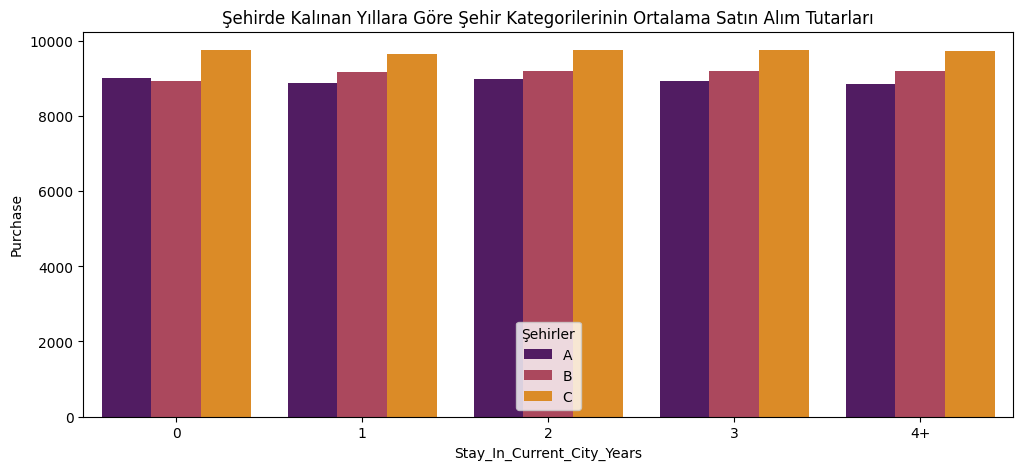

In [87]:
plt.figure(figsize=(12,5))
sns.barplot(data=city_stay , x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",palette="inferno")
plt.legend(title="Şehirler",loc="lower center")
plt.title("Şehirde Kalınan Yıllara Göre Şehir Kategorilerinin Ortalama Satın Alım Tutarları")
plt.show()

ÇIKARIMLAR;
1) A şehri kategorisinde yaşayan insanların aynı şehirde bir yıldan az kaldıkları zamanlarda daha çok harcama yaptıkları görülmüştür.
2) Şehirde kalınan yılların artması şehir kategorilerindeki  satın alma tutarlarını önemli derecede etkilememiştir.

In [88]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,M,55+,16.0,C,4+,0.0,8.0,7969.0


# Medeni Durumun Cinsiyete Göre Harcama Tutarları
1) Bekar olan erkekler evli olan erkeklerden daha fazla para harcıyor.
2) Evli olan kadınlar bekar olan kadınlardan daha fazla para harcıyor.


In [89]:
df2.groupby(["Marital_Status","Gender"],as_index =False)[["Purchase"]].mean()

,Marital_Status,Gender,Purchase
0,0.0,F,8681.468244
1,0.0,M,9445.914233
2,1.0,F,8817.847456
3,1.0,M,9405.410093


In [90]:
martial_purchase = df2.groupby(["Marital_Status","Gender"],as_index =False)[["Purchase"]].mean()

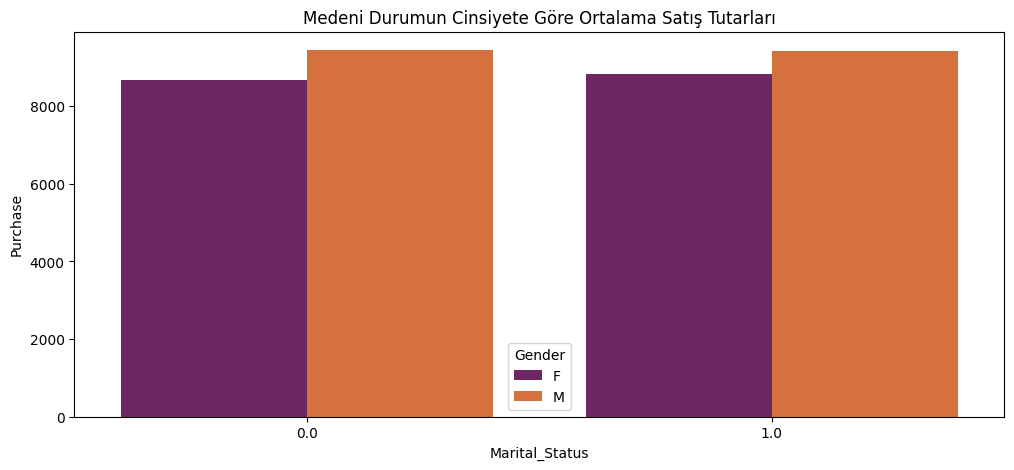

In [91]:
plt.figure(figsize=(12,5))
sns.barplot(data=martial_purchase, x= "Marital_Status" ,y="Purchase",hue="Gender",palette="inferno")
plt.title("Medeni Durumun Cinsiyete Göre Ortalama Satış Tutarları")
plt.show()

# FEATURE ENGİNEERİNG
1. Model Performansını Artırma
2. Daha İyi Anlamlı Kümeler Oluşturma
3. Veri Temizliği ve Düzenleme
4. Veri Setini Modeller İçin Optimize Etme
5. Yeni İlişkiler ve Anlamlı Özellikler Keşfetme sağlar.
6. Model Türünden Bağımsız Çalışabilme
Özellik mühendisliği, derin öğrenme, regresyon veya karar ağaçları gibi her tür modelde faydalıdır.
Özellikle kümelenme algoritmalarında (K-Means, DBSCAN) yeni özellikler daha doğru segmentler elde edilmesini sağlar.
7. İleri Düzey Modellerin İhtiyaçlarını Karşılama
Derin öğrenme gibi karmaşık modellerde yüksek boyutlu veri ve öznitelik mühendisliği büyük önem taşır.
Kategorik verilerin sayısal verilere dönüştürülmesi, ileri düzey modellerin daha etkili çalışmasını sağlar.

In [92]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [93]:
cat_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Occupation',
 'Product_Category_1']

In [94]:
num_cols

['Occupation', 'Product_Category_1']

In [95]:
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category_1']

num_cols = ['Purchase']

In [96]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...
550063,M,51-55,13.0,B,1,1.0,20.0,368.0
550064,F,26-35,1.0,C,3,0.0,20.0,371.0
550065,F,26-35,15.0,B,4+,1.0,20.0,137.0
550066,F,55+,4.0,C,2,0.0,20.0,365.0


In [97]:
df2.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# Label Encoding Ve One-Hot Encoding  İle Kategorik  Değişkenlerdeki Verileri Nümerik Hale Getirme

**Label Encoding, kategorik değişkenleri makine öğrenimi algoritmalarında kullanılabilir hale getirmek için sayısal değerlere dönüştürmek amacıyla yaptığımız bir işlemdir. Bu yöntem, özellikle sıralı kategorik değişkenler için uygundur.Her kaetgoriye bensersiz olan sayısal bir değer atadık maskeli olarak verilen katagorilere herhangi bir işlem uygulamadık ilerleyen süreçte müşteri segmantasyonunda fayda sağlayacaktır.Yaş ve Şehir kategorisi değişkenleri sıralı olmadığından dolayı One-Hot Encoding ile nümerik hale getirdik.**


In [98]:

label_encoder = LabelEncoder()

df2['Gender'] = label_encoder.fit_transform(df2['Gender'])  # F: 0, M: 1
df2['Stay_In_Current_City_Years'] = df2['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)


In [99]:

# 'City_Category' sütununu One-Hot Encoding ile dönüştürme
df2 = pd.get_dummies(df2, columns=['City_Category','Age'], drop_first=True,dtype=int)





# Min-Max Standartlaştırma
**MinMaxScaler() kullanarak satış tutarlarını sütunundaki değerleri 0 ile 1 arasında bir ölçeğe dönüştürdük.Bu yöntem, bir veri setindeki her bir değeri, veri setindeki minimum ve maksimum değerler arasında yeniden ölçekler.**
1) Farklı ölçeklerdeki değerleri dengeli hale getirdik
2) Normalleştirilmiş değerler sayesinde algoritmalar daha hızlı ve verimli çalışabilir.

In [100]:

scaler = MinMaxScaler()
df2['Purchase_Scaled'] = scaler.fit_transform(df2[['Purchase']])



Purchase ve Purchase_Scaled Arasındaki Korelasyon: 0.9999999999999983


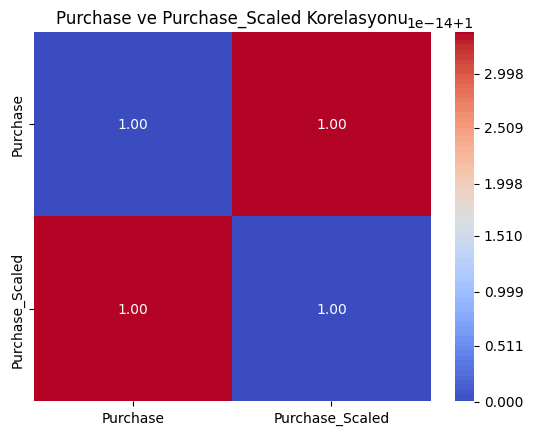

In [101]:
correlation = df2['Purchase'].corr(df2['Purchase_Scaled'])
print(f"Purchase ve Purchase_Scaled Arasındaki Korelasyon: {correlation}")

# Korelasyon matrisini görselleştirme
correlation_matrix = df2[['Purchase', 'Purchase_Scaled']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Purchase ve Purchase_Scaled Korelasyonu')
plt.show()

In [102]:

numerical_cols = [ 'Product_Category_1', 'Purchase']
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)


                    Product_Category_1  Purchase
Product_Category_1            1.000000 -0.339042
Purchase                     -0.339042  1.000000


# Yeni Özellik;Satın Alma Seviyesi(Purchase_Category) 
**apply yöntemiyle categorize_purchase fonksiyonunu tüm Purchase değerlerine uyguladık ve sonuçları Purchase_Category adlı yeni bir sütun olarak veri setine ekledik.Müşterileri harcama davranışlarına göre sınıflandırmak, farklı müşteri gruplarını anlamaya yardımcı olur.Örneğin, "High" kategorisindeki müşteriler, daha fazla kazanç sağlayan önemli bir grup olabilir.Bu işlemle, müşteri harcama davranışları hakkında daha net bir segmentasyon elde ettik. Bu, veriye dayalı pazarlama stratejileri geliştirme, müşteri analizi yapma ve müşteri grupları arasında karşılaştırmalar için faydalı bir adımdır.**



In [103]:

def categorize_purchase(value):
    if value < 5000:
        return 'Low'
    elif 5000 <= value < 15000:
        return 'Medium'
    else:
        return 'High'


df2['Purchase_Category'] = df2['Purchase'].apply(categorize_purchase)




**Yeni oluşturduğumuz değişkenimizi kategorik olduğu için bensersiz sayı ataması gerçekleştirerek nümerik hale getirdik.**

In [104]:

purchase_category_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df2['Purchase_Category'] = df2['Purchase_Category'].map(purchase_category_mapping)


# Yeni Özellik;Kategori Bazlı Ortalama Harcama (Category_Avg_Purchase) ve Kategoriden Sapma Miktarı (Purchase_vs_Category_Avg)

**Category_Avg_Purchase:Kullanıcıların satın almış olduğu ürünün kategorisindeki normalleştirilmiş ortalama satış tutarını hesaplar.Purchase_vs_Category_Avg:Kullanıcının normalleştirilmiş satın alma değerini, ait olduğu kategorinin ortalama değerinden çıkararak bir fark hesaplar.**

1)  Bu fark, kullanıcının kategorideki ortalama harcama davranışına göre daha fazla mı, yoksa daha az mı harcama yaptığını gösterir.
2)  Pozitif bir değer, kullanıcının kategori ortalamasının üzerinde harcama yaptığını gösterirken, negatif bir değer, kategori ortalamasının altında kaldığını belirtir.
3)  Kullanıcıların harcama davranışlarını, kategorilerindeki ortalama ile kıyaslama yaparak daha anlamlı hale getirir.
4)  Daha yüksek harcama yapan kullanıcılar, "yüksek değerli müşteri" olarak sınıflandırılabilir ve bu kullanıcılara özel teklifler sunulabilir.
5)  Daha düşük harcama yapan kullanıcılara yönelik kampanyalar ya da teşvikler planlanabilir.
6)  Hangi kategorilerde, kullanıcıların ortalama harcamalarının daha yüksek veya düşük olduğu belirlenebilir.
7)  Bu bilgiler, iş stratejileri geliştirilirken  kullanılabilir.


In [105]:

category_avg_purchase = df2.groupby('Product_Category_1')['Purchase_Scaled'].mean()
df2['Category_Avg_Purchase'] = df2['Product_Category_1'].map(category_avg_purchase)
df2['Purchase_vs_Category_Avg'] = df2['Purchase_Scaled'] - df2['Category_Avg_Purchase']
df2[['Product_Category_1', 'Purchase_Scaled', 'Category_Avg_Purchase', 'Purchase_vs_Category_Avg']]


,Product_Category_1,Purchase_Scaled,Category_Avg_Purchase,Purchase_vs_Category_Avg
0,3.0,0.348992,0.419930,-0.070938
1,1.0,0.634181,0.562666,0.071515
2,12.0,0.058875,0.065593,-0.006718
3,12.0,0.043634,0.065593,-0.021959
4,8.0,0.332248,0.314727,0.017521
...,...,...,...,...
550063,20.0,0.014865,0.025230,-0.010365
550064,20.0,0.014990,0.025230,-0.010240
550065,20.0,0.005219,0.025230,-0.020010
550066,20.0,0.014740,0.025230,-0.010490


In [106]:
df2

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,City_Category_B,City_Category_C,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Purchase_Scaled,Purchase_Category,Category_Avg_Purchase,Purchase_vs_Category_Avg
0,0,10.0,2,0.0,3.0,8370.0,0,0,0,0,0,0,0,0,0.348992,1,0.419930,-0.070938
1,0,10.0,2,0.0,1.0,15200.0,0,0,0,0,0,0,0,0,0.634181,2,0.562666,0.071515
2,0,10.0,2,0.0,12.0,1422.0,0,0,0,0,0,0,0,0,0.058875,0,0.065593,-0.006718
3,0,10.0,2,0.0,12.0,1057.0,0,0,0,0,0,0,0,0,0.043634,0,0.065593,-0.021959
4,1,16.0,4,0.0,8.0,7969.0,0,1,0,0,0,0,0,1,0.332248,1,0.314727,0.017521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,13.0,1,1.0,20.0,368.0,1,0,0,0,0,0,1,0,0.014865,0,0.025230,-0.010365
550064,0,1.0,3,0.0,20.0,371.0,0,1,0,1,0,0,0,0,0.014990,0,0.025230,-0.010240
550065,0,15.0,4,1.0,20.0,137.0,1,0,0,1,0,0,0,0,0.005219,0,0.025230,-0.020010
550066,0,4.0,2,0.0,20.0,365.0,0,1,0,0,0,0,0,1,0.014740,0,0.025230,-0.010490


#  Kategoriden Sapma Miktarı (Purchase_vs_Category_Avg) İle Diğer Değişkenlerin Korelasyonu


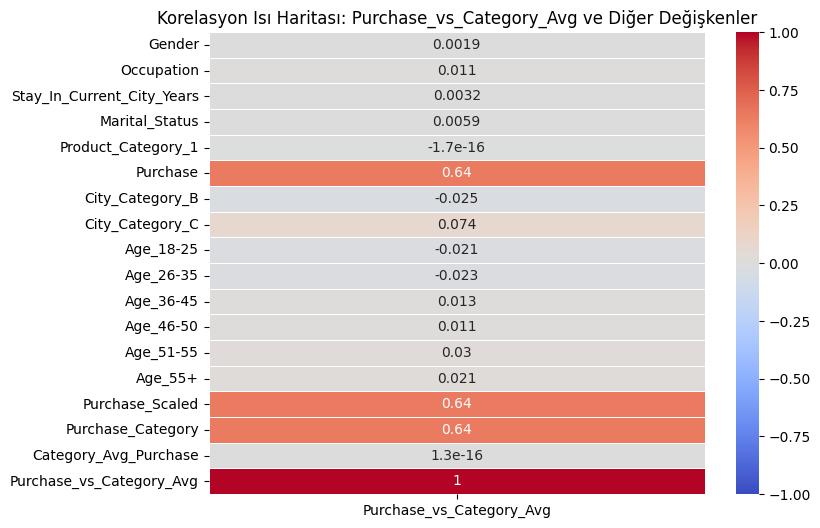

In [107]:
correlation_matrix = df2.corr()
purchase_vs_category_avg_corr = correlation_matrix[['Purchase_vs_Category_Avg']]
plt.figure(figsize=(8, 6))
sns.heatmap(purchase_vs_category_avg_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Korelasyon Isı Haritası: Purchase_vs_Category_Avg ve Diğer Değişkenler')
plt.show()

**Kategoriden sapma miktarı o kişinin satın alma seviyesi ve satın alma mikatrına bağlı pozitif yönde değişebilir 0.64 pozitif bir korelasyon aralığına girer.Bu, kategoriden sapma mikatrının iki değişken arasında orta düzeyden güçlüye yakın bir pozitif doğrusal ilişki olduğunu gösterir.**

# Satın Alma Tutarı Ve Diğer Değişkenlerin Korelasyonu



Purchase_Scaled               1.000000
Purchase                      1.000000
Purchase_Category             0.891955
Category_Avg_Purchase         0.768806
Purchase_vs_Category_Avg      0.639482
Gender                        0.059758
City_Category_C               0.059724
Occupation                    0.020720
Age_51-55                     0.014316
Age_36-45                     0.006902
Stay_In_Current_City_Years    0.005119
Age_55+                       0.003243
Marital_Status               -0.000452
Age_26-35                    -0.002700
Age_46-50                    -0.003167
Age_18-25                    -0.008058
City_Category_B              -0.018411
Product_Category_1           -0.334111
Name: Purchase, dtype: float64


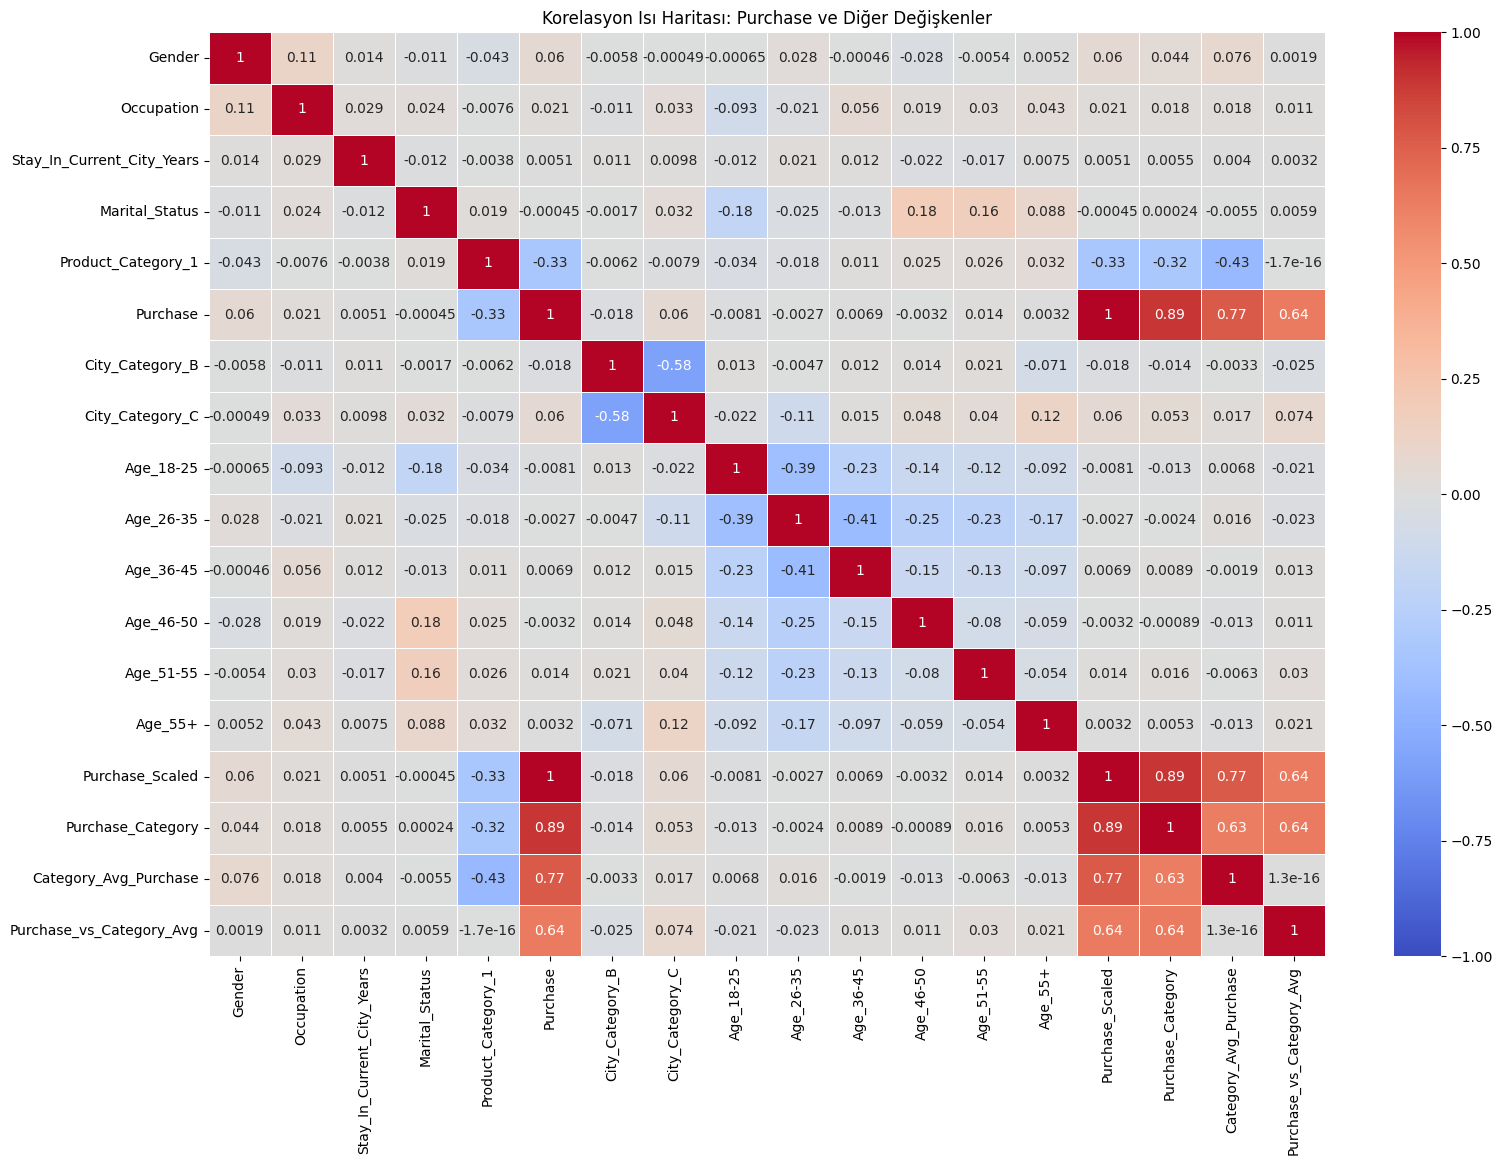

In [108]:
correlation_matrix = df2.corr()
purchase_corr = correlation_matrix['Purchase'].sort_values(ascending=False)
print(purchase_corr)
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Korelasyon Isı Haritası: Purchase ve Diğer Değişkenler')
plt.show()

1. Güçlü Pozitif İlişkiler
Purchase_normalized (1.000): Bu beklenen bir sonuçtur, çünkü Purchase_normalized doğrudan Purchase değerlerinden türetilmiştir. Korelasyon katsayısı doğal olarak birdir.
Purchase_Category (0.892) : Satın alma miktarını kategorilere ayıran bu değişken ile Purchase arasında güçlü bir pozitif ilişki vardır. Bu, satın alma miktarlarının kategorilendirilmesinin tutarlı olduğunu ve miktar ile kategori arasında net bir bağ bulunduğunu gösterir.
Category_Avg_Purchase (0.769): Kategori bazında ortalama satın alma ile bireysel satın alma arasında anlamlı bir ilişki vardır. Bu, bireysel harcamaların kategori ortalamalarını yansıttığını gösterir.
2. Orta Düzey Pozitif İlişkiler
Purchase_vs_Category_Avg (0.639): Bireysel satın alma ile kategori ortalaması arasındaki fark, Purchase ile orta düzeyde bir ilişki içindedir. Bu da bireysel satın alma davranışının kategori ortalamalarından etkilenebileceğini gösterir.
3. Çok Zayıf Pozitif İlişkiler
Gender (0.060): Cinsiyet ile satın alma arasında çok zayıf bir pozitif ilişki vardır. Cinsiyetin satın alma miktarını belirlemede neredeyse hiçbir etkisi yoktur.
City_Category_C (0.060): Bu şehir kategorisinde yaşamak ile satın alma miktarı arasında zayıf bir ilişki gözlemlenmiştir.
4. Negatif İlişkiler
Product_Category_1 (-0.334): Ürün kategorisi 1 ile satın alma arasında orta düzeyde bir negatif ilişki vardır. Bu, belirli ürün kategorilerinde satın alma miktarlarının daha düşük olabileceğini gösterebilir.
City_Category_A (-0.042): Bu şehir kategorisinde yaşamak ile satın alma miktarı arasında çok zayıf bir negatif ilişki vardır.
5. İlişkisiz veya Anlamsız İlişkiler
Occupation (0.021): Meslek satın alma miktarını etkilememektedir.
Marital_Status (-0.0005): Evli olup olmama durumu tamamen ilgisizdir.
Stay_In_Current_City_Years (0.005): Yaşanılan şehirdeki süre satın alma üzerinde çok düşük bir etkiye sahiptir.

# K-Means Uygulamasının Uygunluğu
K-Means, verileri belirli özelliklere dayalı olarak kümelere ayırmak için kullanılan bir algoritmadır ve bu veri seti K-Means uygulaması için uygundur. Bunun nedenleri:

Nümerik Veriler: Tüm değişkenler numerik formata dönüştürülmüştür, bu da K-Means algoritmasının doğasına uygundur.
Ölçeklendirme: Değişkenler standartlaştırılmış veya ölçeklendirilmiştir (Purchase_Scaled gibi), bu durum K-Means'in mesafe tabanlı çalışmasında önemlidir.
Segmentasyon Hedefi: K-Means, müşteri segmentlerini belirlemek için idealdir. Bu veri setinde müşteri davranışları (örneğin satın alma miktarı, ürün kategorisi) ve demografik bilgiler (örneğin yaş, medeni durum) üzerinden segmentler oluşturulabilir.
K-Means kullanılarak:

Müşteriler, benzer satın alma alışkanlıklarına veya demografik özelliklere göre gruplandırılabilir.
Her segmentin özel ihtiyaçları ve alışkanlıkları belirlenerek pazarlama stratejileri optimize edilebilir.
Bu ön işleme ve mühendislik adımları, müşteri segmentasyonu analizi için sağlam bir temel oluşturmuştur. Şimdi, K-Means ile segmentasyon yapılarak müşteriler arasındaki farklılıklar daha detaylı incelenebilir ve anlamlı içgörüler elde edilebilir.








In [109]:
df2

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,City_Category_B,City_Category_C,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Purchase_Scaled,Purchase_Category,Category_Avg_Purchase,Purchase_vs_Category_Avg
0,0,10.0,2,0.0,3.0,8370.0,0,0,0,0,0,0,0,0,0.348992,1,0.419930,-0.070938
1,0,10.0,2,0.0,1.0,15200.0,0,0,0,0,0,0,0,0,0.634181,2,0.562666,0.071515
2,0,10.0,2,0.0,12.0,1422.0,0,0,0,0,0,0,0,0,0.058875,0,0.065593,-0.006718
3,0,10.0,2,0.0,12.0,1057.0,0,0,0,0,0,0,0,0,0.043634,0,0.065593,-0.021959
4,1,16.0,4,0.0,8.0,7969.0,0,1,0,0,0,0,0,1,0.332248,1,0.314727,0.017521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,13.0,1,1.0,20.0,368.0,1,0,0,0,0,0,1,0,0.014865,0,0.025230,-0.010365
550064,0,1.0,3,0.0,20.0,371.0,0,1,0,1,0,0,0,0,0.014990,0,0.025230,-0.010240
550065,0,15.0,4,1.0,20.0,137.0,1,0,0,1,0,0,0,0,0.005219,0,0.025230,-0.020010
550066,0,4.0,2,0.0,20.0,365.0,0,1,0,0,0,0,0,1,0.014740,0,0.025230,-0.010490
